# KPrototypes(k=4) Results

From the previous notebook, we have identified that `k=4` is the optimum number of clusters.  
In this notebook, we will explore what the `4` individual clusters represent.

**Setting up**

In [2]:
%load_ext kedro.ipython
%load_ext autoreload
%matplotlib inline
%autoreload 2

[04/19/23 19:51:20] INFO     Resolved project path as: /home/eckt/Documents/usg.                    ]8;id=316316;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=38898;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py#134\134]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

[04/19/23 19:51:22] INFO     Kedro project usg                                                      ]8;id=506146;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=691213;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py#103\103]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=625905;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=16232;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py#104\104]8;;\
                             'pipelines'                                                                           

[04/19/23 19:51:24] INFO     Registered line magic 'run_viz'                                        ]8;id=605444;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=503703;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py#110\110]8;;\

In [3]:
import pandas as pd
import polars as pl
import numpy as np

from matplotlib import rc_context
import matplotlib.pyplot as plt
import seaborn as sb
from seaborn.objects import Plot
import seaborn.objects as so

from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.decomposition import PCA

import logging

from usg.utils import *

log = logging.getLogger(__name__)
log.setLevel(logging.INFO)
sb.set()

In [4]:
k = 4
kaggle_steam: pd.DataFrame = catalog.load('kaggle_steam').set_index('appid')
X: pd.DataFrame = catalog.load('train').set_index('appid')
sscaler: StandardScaler = catalog.load('model@sscaler')
pscaler: PowerTransformer = catalog.load('model@pscaler')
pca: PCA = catalog.load('model@pca')
model: KPrototypes = catalog.load(f'model@kprototypes@{k}')
clusters: pd.Series = catalog.load(f'labels@kprototypes@{k}')['cluster'].set_axis(X.index)

def unpca(X: pd.DataFrame):
    u = pd.DataFrame(pca.inverse_transform(X[pca.get_feature_names_out()]), columns=pca.feature_names_in_, index=X.index)
    return pd.concat([X.loc[:, categorical], u], axis=1)[columns]

def inverse_transform(X: pd.DataFrame):
    sdf = pd.DataFrame(sscaler.inverse_transform(X[sscaler.feature_names_in_]), columns=sscaler.feature_names_in_, index=X.index)
    pdf = pd.DataFrame(pscaler.inverse_transform(X[pscaler.feature_names_in_]), columns=pscaler.feature_names_in_, index=X.index)
    X = pd.concat([X.loc[:, categorical], sdf, pdf], axis=1)[columns]
    X['est_owners'] = 10 ** X['est_owners']
    return X

X = unpca(X)
kaggle_steam['cluster'] = X['cluster'] = clusters

[04/19/23 19:51:26] INFO     Loading data from 'kaggle_steam' (CSVDataSet)...                   ]8;id=693567;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=164193;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py#343\343]8;;\

                    INFO     Loading data from 'train' (CSVDataSet)...                          ]8;id=359395;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=810379;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py#343\343]8;;\

[04/19/23 19:51:27] INFO     Loading data from 'model@sscaler' (PickleDataSet)...               ]8;id=329220;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=172323;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py#343\343]8;;\

                    INFO     Loading data from 'model@pscaler' (PickleDataSet)...               ]8;id=360562;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=464158;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py#343\343]8;;\

                    INFO     Loading data from 'model@pca' (PickleDataSet)...                   ]8;id=570531;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=954304;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py#343\343]8;;\

                    INFO     Loading data from 'model@kprototypes@4' (PickleDataSet)...         ]8;id=196907;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=882557;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py#343\343]8;;\

                    INFO     Loading data from 'labels@kprototypes@4' (CSVDataSet)...           ]8;id=937355;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=126883;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py#343\343]8;;\

In [5]:
centroids_u = unpca(pd.DataFrame(model.cluster_centroids_, columns=list(pca.get_feature_names_out()) + categorical)) # KPrototypes handles categorical last
centroids = inverse_transform(centroids_u)

In [6]:
def melt_only(X: pd.DataFrame, columns: "list[str]"):
    pred = X['variable'].map(lambda x: x in columns)
    return X[pred]

counts = X['cluster'].value_counts()

viz = centroids_u.reset_index(names='cluster').melt(id_vars='cluster')
viz['categorical'] = viz['variable'].map(lambda x: x in categorical)
centroid_viz_data = (viz
                     .reset_index(names='order')
                     .set_index(['cluster', 'variable'])
                     .join(centroids
                           .reset_index(names='cluster')
                           .melt(id_vars='cluster', value_name='orig')
                           .set_index(['cluster', 'variable'])
                           .round(2)
                     )
                     .reset_index('cluster')
                     .join(X[columns].median()
                           .to_frame('median'),
                           how='left'
                     )
                     .reset_index(names='variable')
                     .set_index('cluster')
                     .sort_values(by='order'))

cluster_viz_data = X.melt(id_vars='cluster')#.set_index('cluster')
cluster_viz_data['categorical'] = cluster_viz_data['variable'].map(lambda x: x in categorical)
cluster_viz_data_numerical = cluster_viz_data[~cluster_viz_data['categorical']]
minmax = X[numerical].describe().loc[['min', '25%', '50%', '75%', 'max'], :].T.reset_index(names='variable').melt(id_vars='variable', var_name='indicators')

def centroid_viz(cluster=0):
    df = centroid_viz_data.loc[cluster].reset_index(drop=True)
    return (Plot(data=df, y="variable", x="value", color="categorical")
    .add(so.Bar(width=0.05, color="lightgrey", alpha=0.6), baseline="median", legend=False)
    .add(so.Dot())
    .add(so.Dot(fill=False), x="median", legend=False)
    .add(so.Text(halign="left", fontsize=8, offset=8, color="black"), text="orig")
    .label(title=f"Visualisation of cluster {cluster} centroid (n={counts[cluster]})")
    #.limit(x=(-0.05,1.2))
    )

def cluster_viz(cluster=0):
    fig, ax = plt.subplots(ncols=2, figsize=(12,6), sharex=True)
    fig.set_tight_layout(True)
    df = cluster_viz_data.set_index('cluster').loc[cluster].reset_index(drop=True)
    df2 = cluster_viz_data_numerical.set_index('cluster').loc[cluster].reset_index(drop=True)
    (sb.boxplot(data=df, 
                x='value', 
                y='variable', 
                ax=ax[0],
                fliersize=2,
                flierprops={"marker": "x"}, 
                showcaps=False)
    .set(title=f"Visualisation of cluster {cluster} (n={counts[cluster]})"))
    (sb.violinplot(data=df2,
                x='value', 
                y='variable', 
                ax=ax[1],
                hue=True,
                hue_order=[True,False],
                color='lightgrey',
                split=True,
                legend=False)
    .set(title=f"Numeric features"))
    (sb.scatterplot(data=minmax,
                    x='value',
                    y='variable',
                    hue='indicators',
                    marker='d',
                    ax=ax[1]))

## At a glance

**Number of games per cluster**

We observe that each cluster has a good proportion of number of games, and that no single cluster is significantly smaller than the other. This could mean that our results have achieved quite decent generalisation.

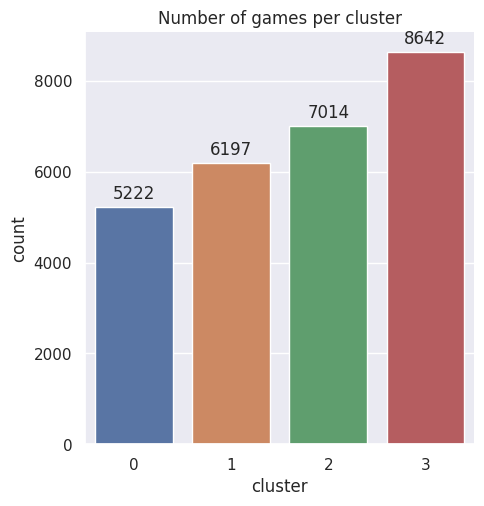

In [7]:
catplot_xlabel(sb.catplot(data=X, x='cluster', kind='count').set(title="Number of games per cluster"))

**Pairplot of PCA axes differentiated by assigned cluster**

We can immediately see that `pca2` and `pca4` are not likely to be helpful due to how similar their distributions look like across clusters. We note that most of the separation can be found in `pca0`, `pca1` and `pca9`. We also note that the last row is the most artistic row.

[04/19/23 19:51:28] INFO     Loading data from 'train' (CSVDataSet)...                          ]8;id=253087;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=423053;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py#343\343]8;;\

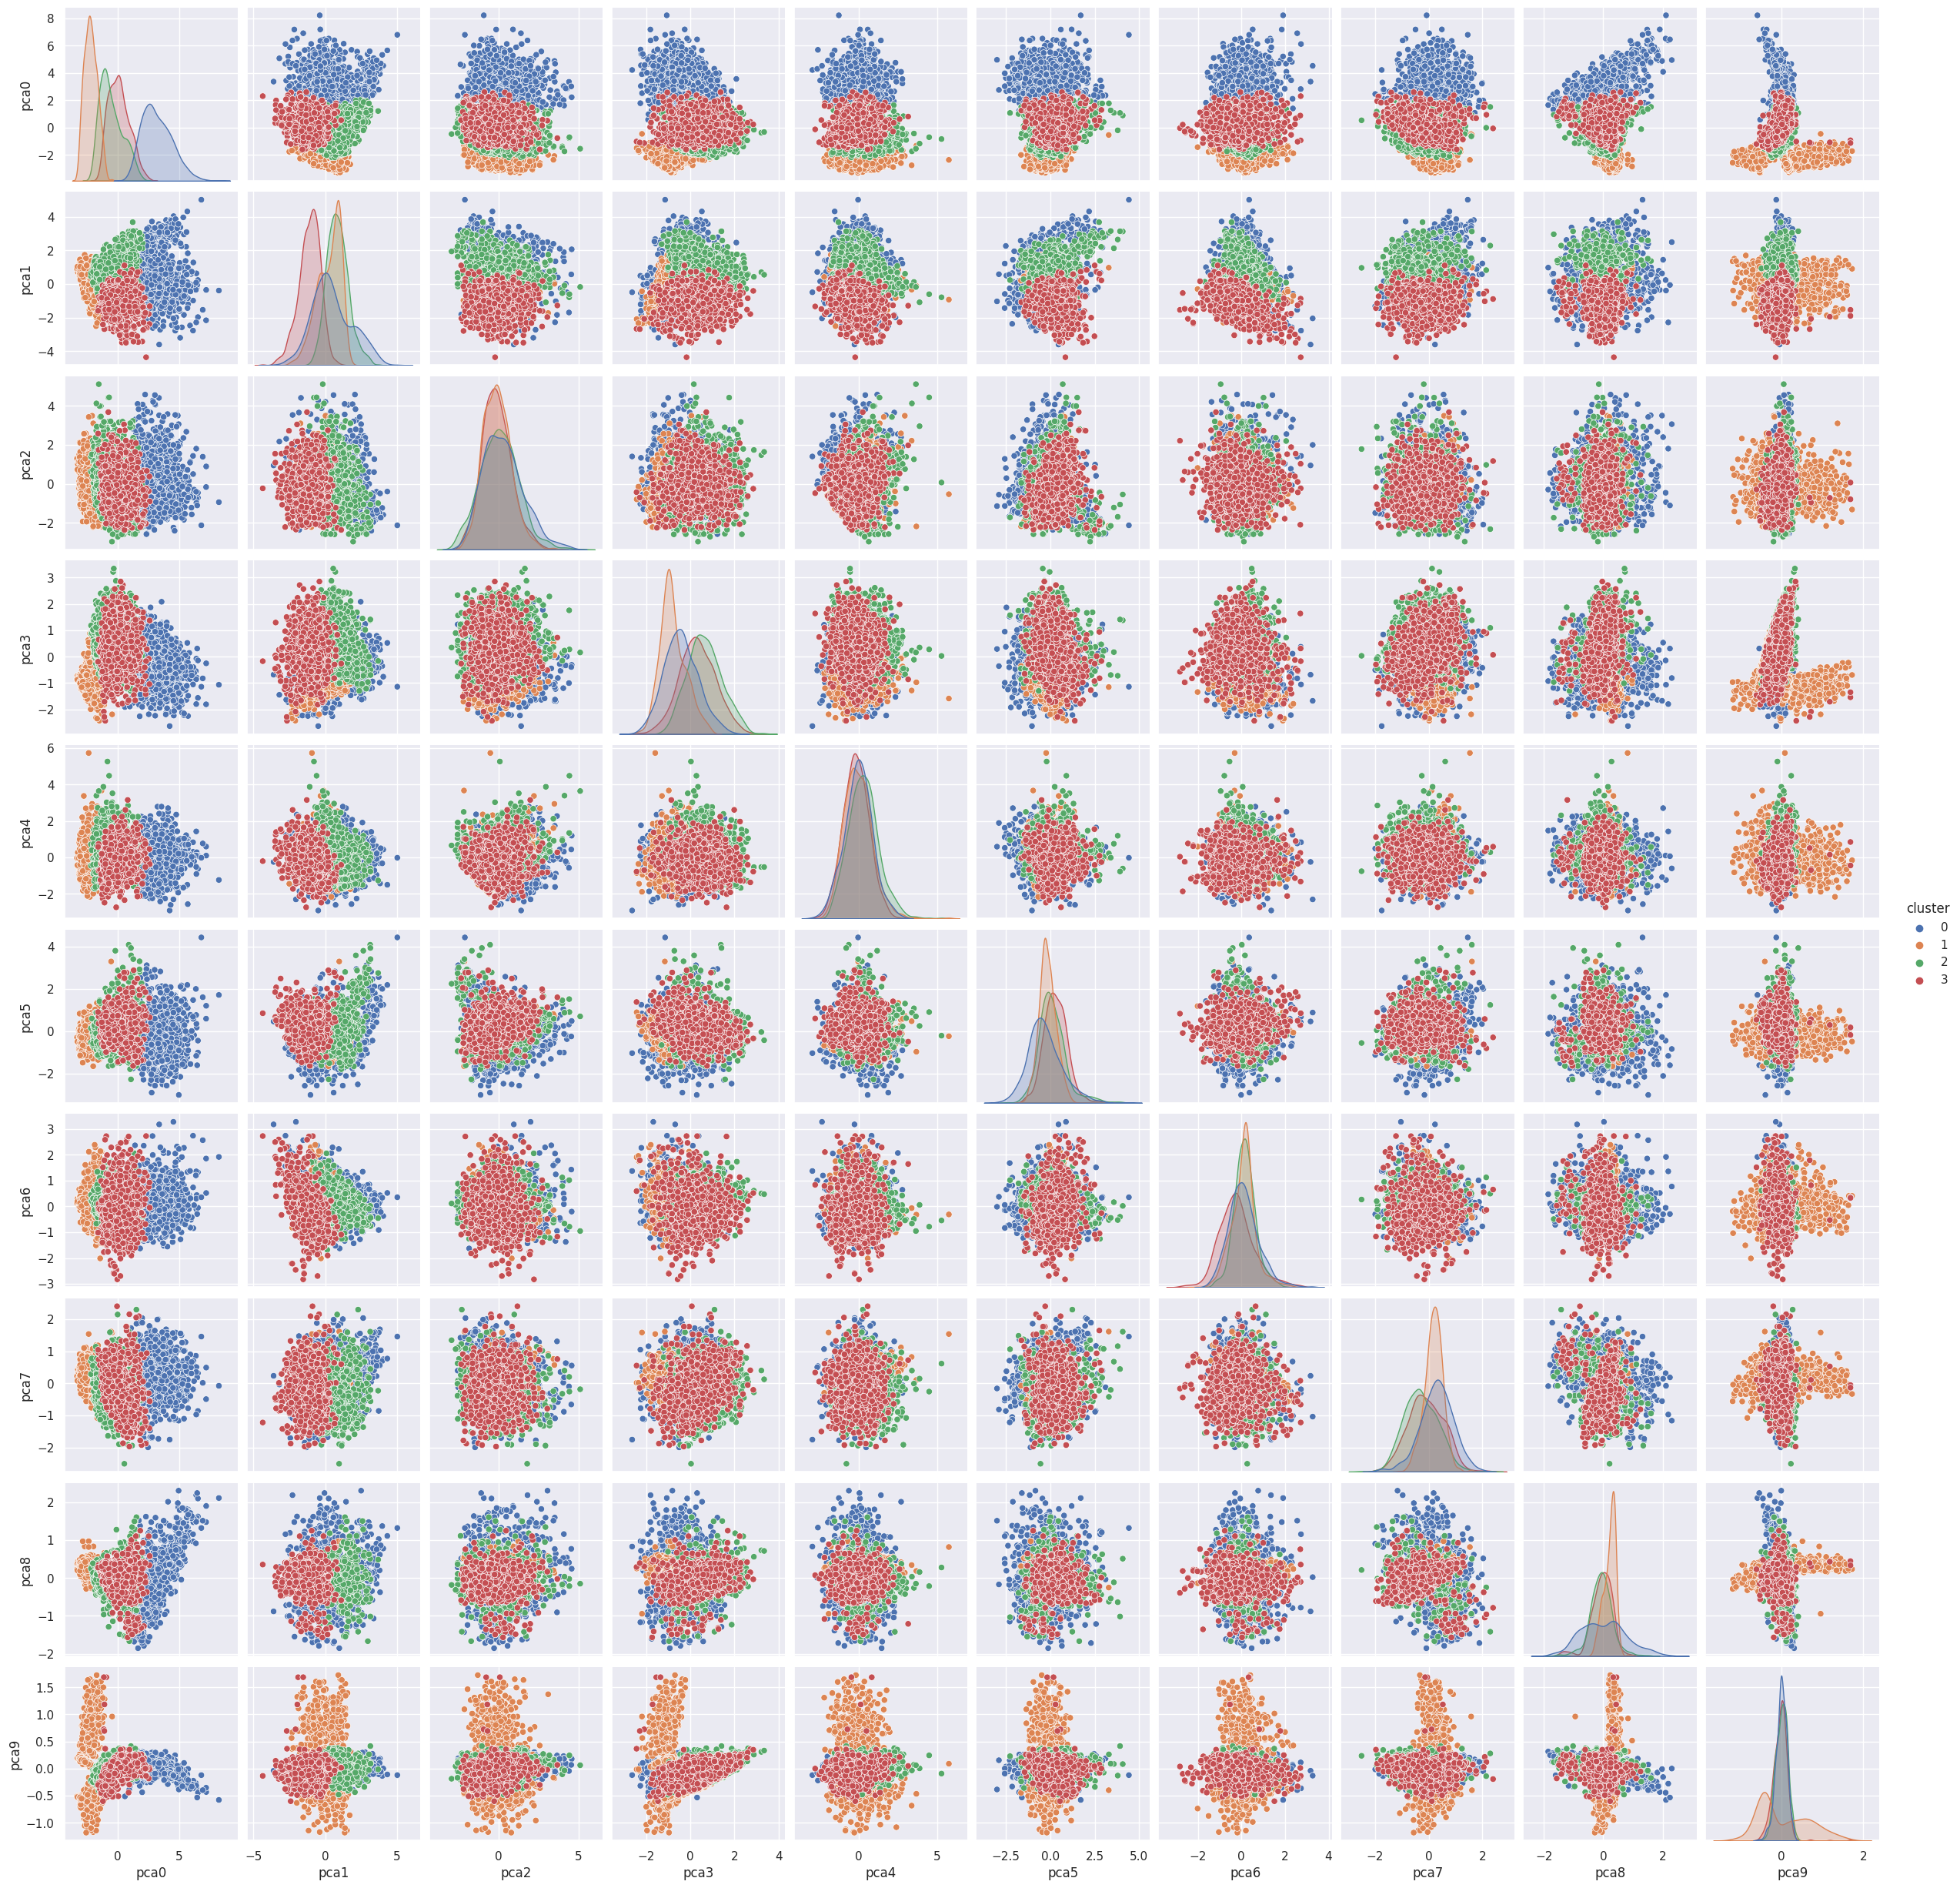

In [8]:
viz = catalog.load('train').set_index('appid')
viz['cluster'] = clusters
viz = viz.groupby(by='cluster').sample(1000)[list(pca.get_feature_names_out()) + ['cluster']]
viz['cluster'] = viz['cluster'].map(str)
sb.pairplot(viz, hue='cluster')

## Centroids

**Categorical features**

Most of the categorical variables were not used to differentiate clusters.  
Only `Steam Achievements`, `Steam Trading Cards` and `Action` were useful.

**Numeric features**

For numeric features, only `num_genres` was not useful.  
The line `x=0` is important for numeric features as we applied `PowerTransformer` indicating that the features were recentered with `0` as the mean.

At a glance, we see `cluster 1` and `cluster 2` are generally on the lower end of the plot while `cluster 0` is on the higher end of the plot.

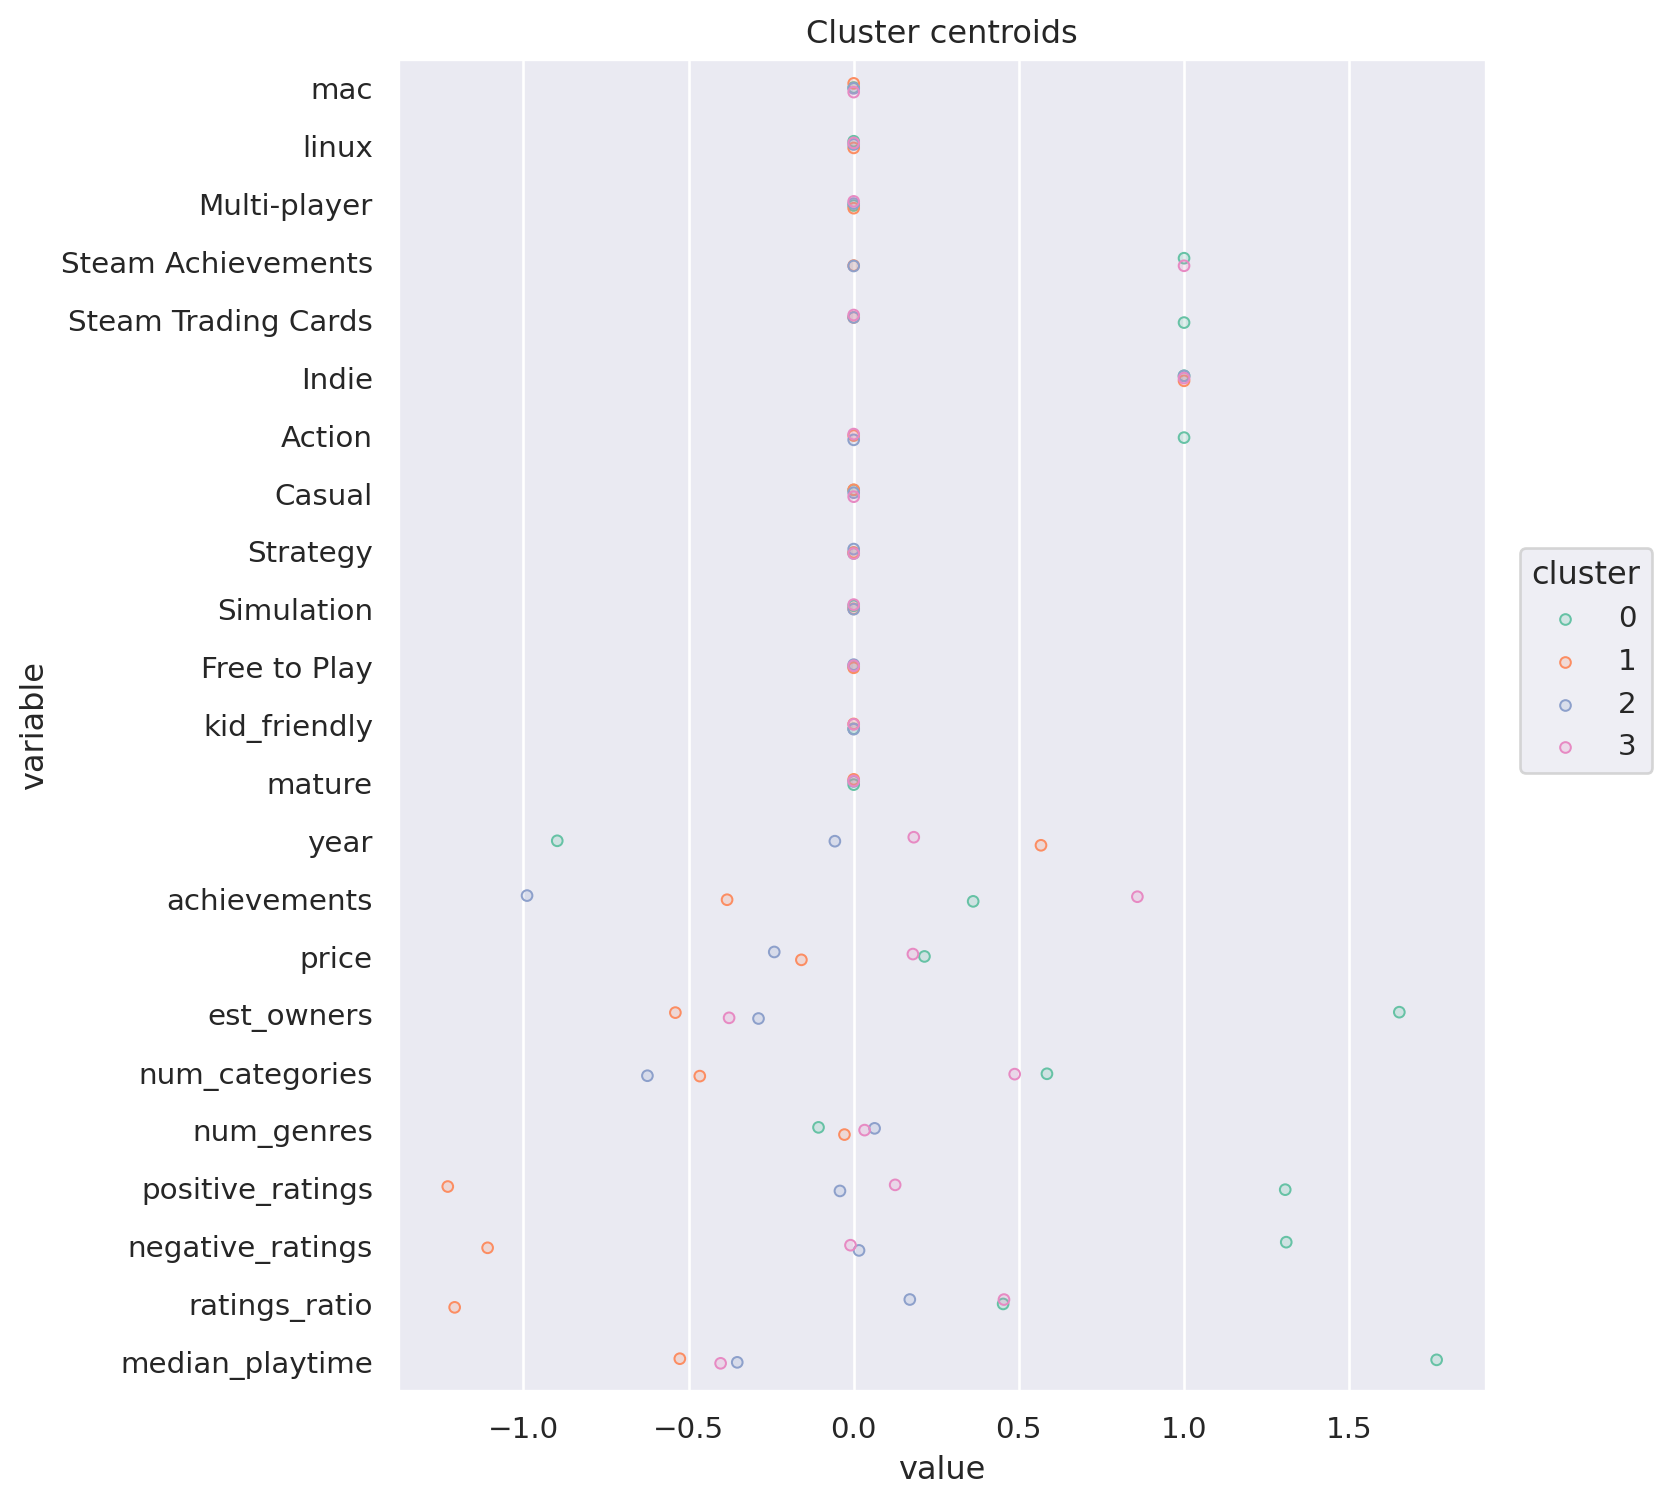

In [9]:
(Plot(data=centroid_viz_data.reset_index(), y="variable", x="value", color="cluster")
 #.limit(x=(-0.05,1.2))
 .layout(size=(8,8))
 .add(so.Dots(), so.Jitter(x=0))
 .label(title='Cluster centroids')
 .scale(color='Set2'))

The following plot shows more conveniently that `cluster 0` is often on the high end while `cluster 1` and `2` are on the low end.

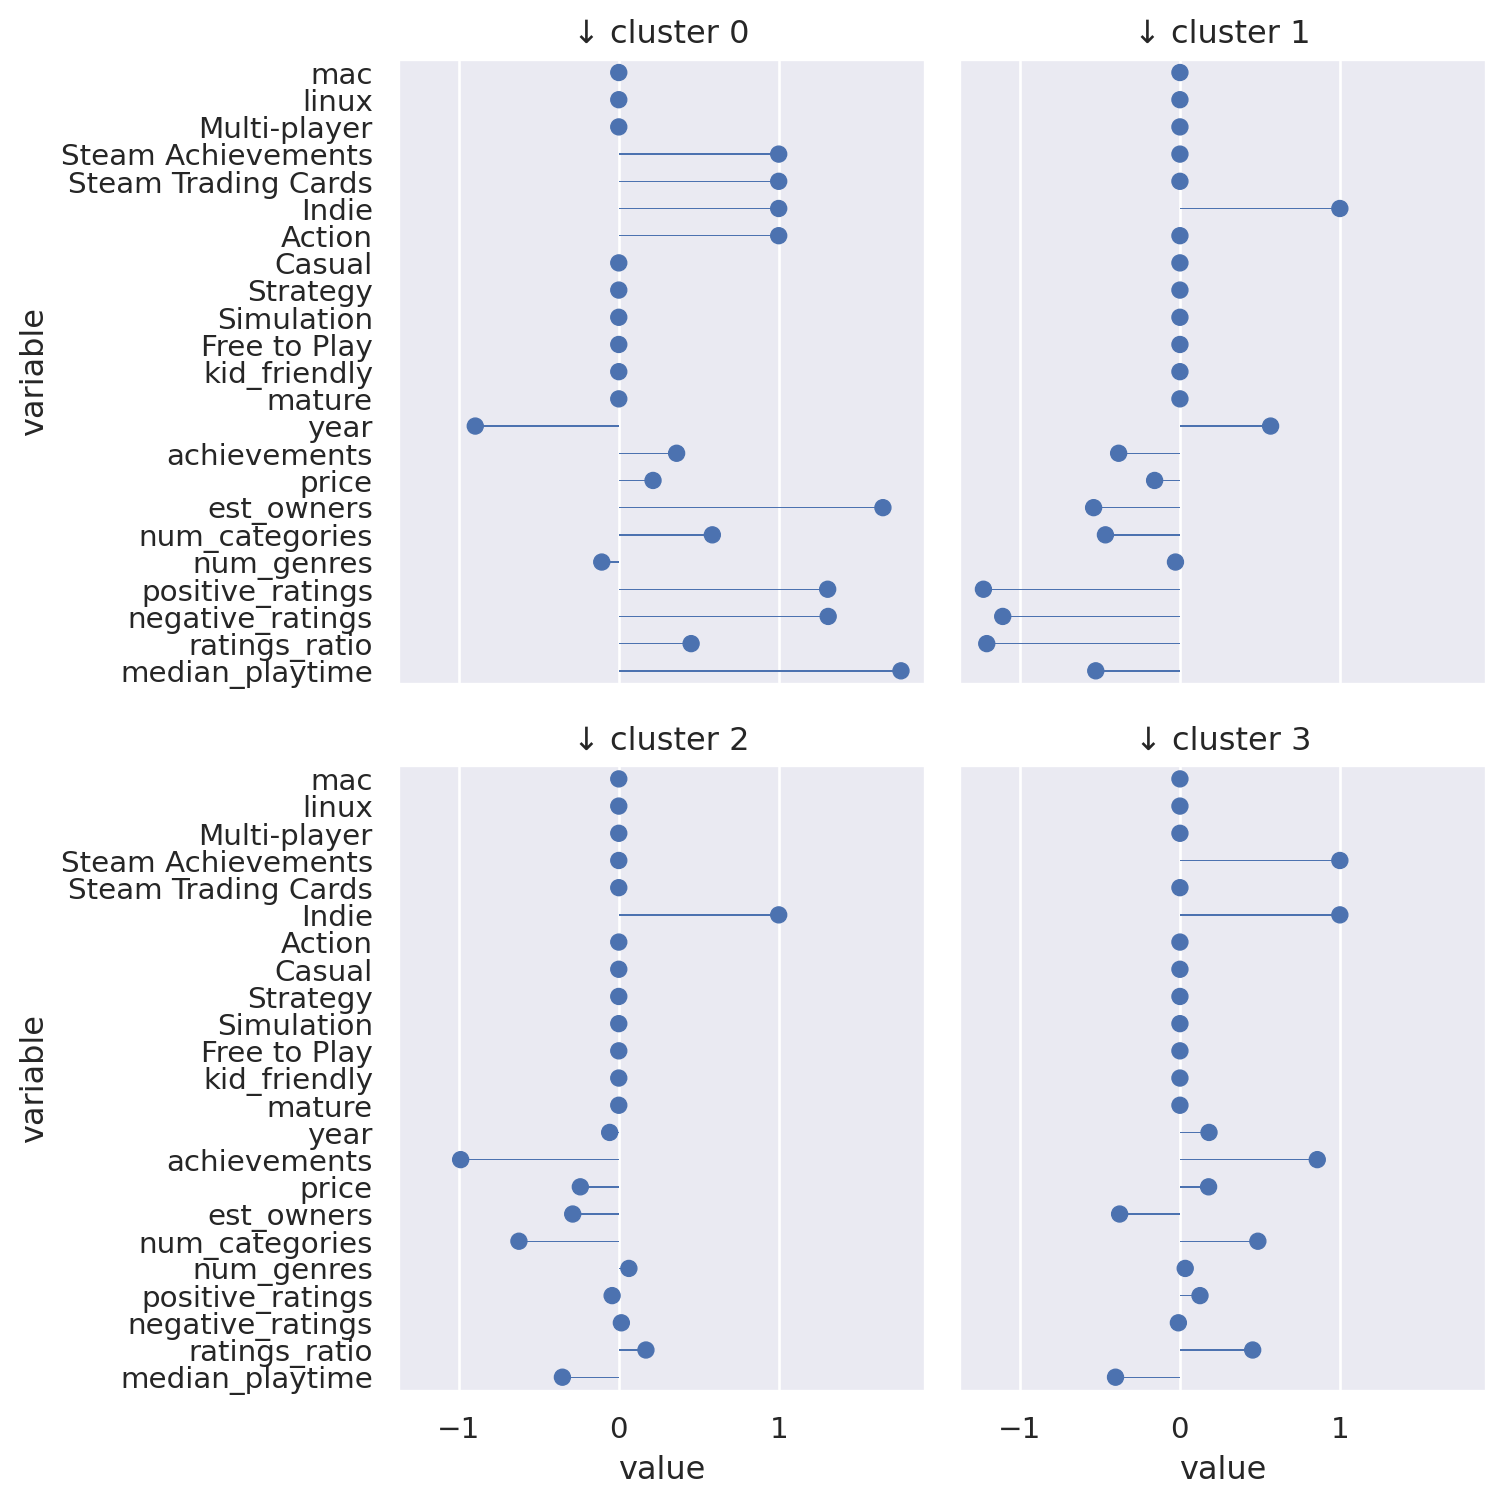

In [10]:
(Plot(data=centroid_viz_data.reset_index(), y="variable", x="value")
 #.limit(x=(-0.05,1.2))
 .layout(size=(8,8))
 .facet(col="cluster", wrap=2)
 .add(so.Bar(width=0.05))
 .add(so.Dot())
 .label(col="↓ cluster"))

# Cluster analysis

## Numeric Features

We can easily see that `Year` has many negative outliers while having 0 positive outliers. This suggests that very old games are not sufficiently distinct enough to form their own cluster.

We see that `est_owners` is very well-defined for clusters 1, 2, and 3, with 25% and 75% quartiles equal to the median. Only cluster 0 distinguishes itself by consisting of games that are more popular. In addition, `median_playtime` follows a similar pattern, with cluster 0 having higher playtimes then the rest.

Both `positive_ratings` and `negative_ratings` prove to be quite correlated as seen in our previous notebook, they tend to follow similar distributions within a cluster.

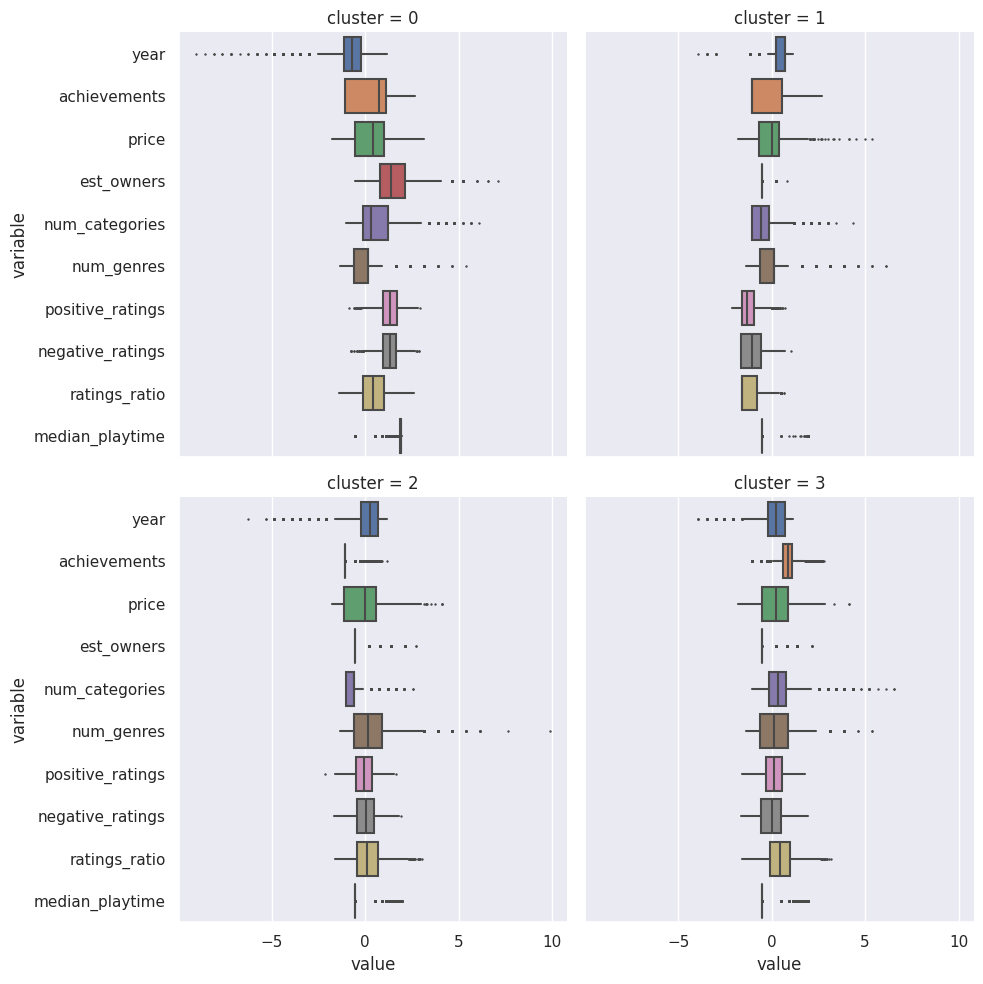

In [11]:
sb.catplot(data=melt_only(cluster_viz_data, numerical), 
           x='value', 
           y='variable', 
           col='cluster', 
           col_wrap=2,
           kind='box', 
           fliersize=2,
           flierprops={"marker": "+"}, 
           showcaps=False)

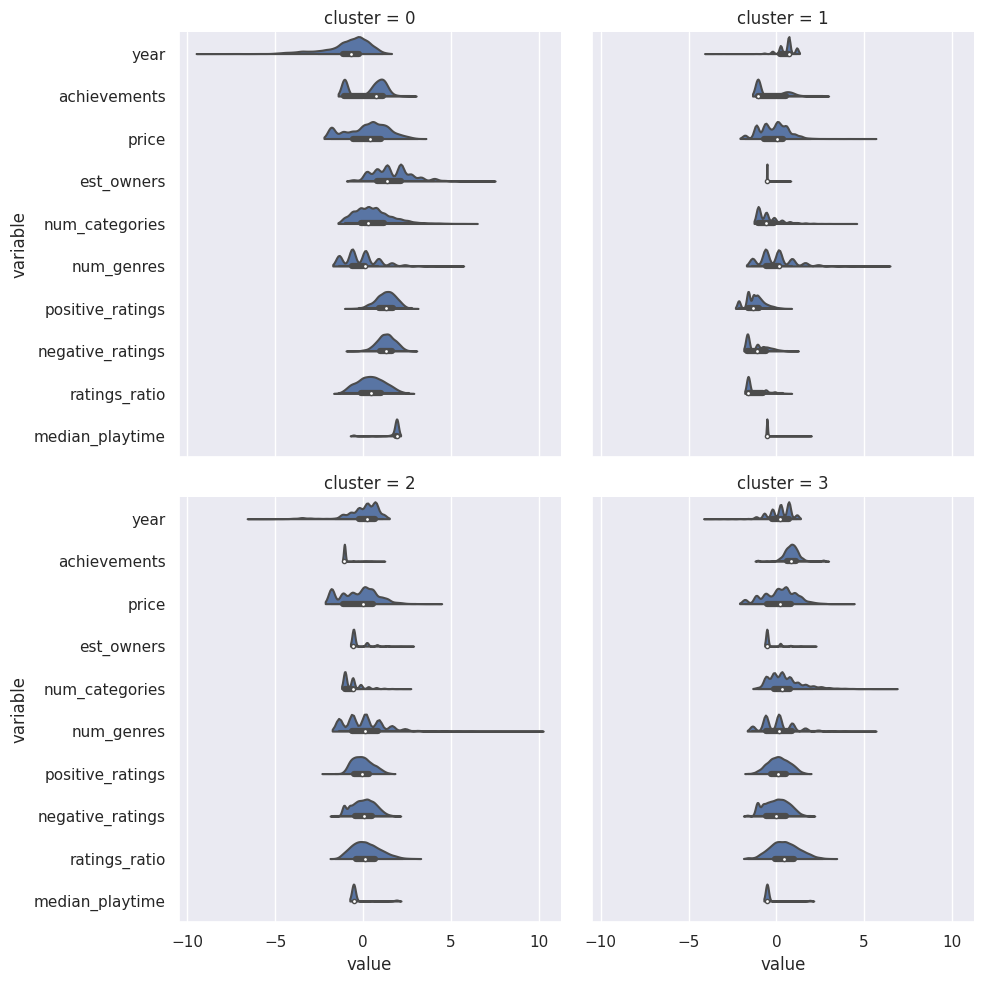

In [12]:
sb.catplot(data=melt_only(cluster_viz_data, numerical), 
           x='value', 
           y='variable', 
           col='cluster', 
           col_wrap=2,
           kind='violin',
           inner='box',
           hue=True,
           hue_order=[True, False],
           split=True,
           legend=False)

## Categorical features

`mac`, `linux`: Cluster 0 and 3 are more cross-platform friendly than 1 and 2.

`Multi-player`: cluster 0 is more likely to contain multiplayer games compared to the other clusters

`Steam Achievements`: cluster 3 is almost guaranteed to have games featuring achievements while cluster 2 is the opposite, most of the games in it do not support achievements.

`Steam Trading Cards`: Cluster 1 is very unlikely to feature games that support `Steam Trading Cards` while cluster 0 contains double the normal proportion of `Steam Trading Cards` across all steam games in general.

`Indie`, `Action`, `Casual`, `Strategy`, `Simulation`: roughly similar across all clusters

`Free to Play`: Cluster 0 and 2 have higher percentage of free to play games in general

`kid_friendly`, `mature`: These games are more likely to be found in cluster 0. (>50%)



*Note that the following graph does not account for the differences in the total size of each cluster. This is corrected in the second graph.*

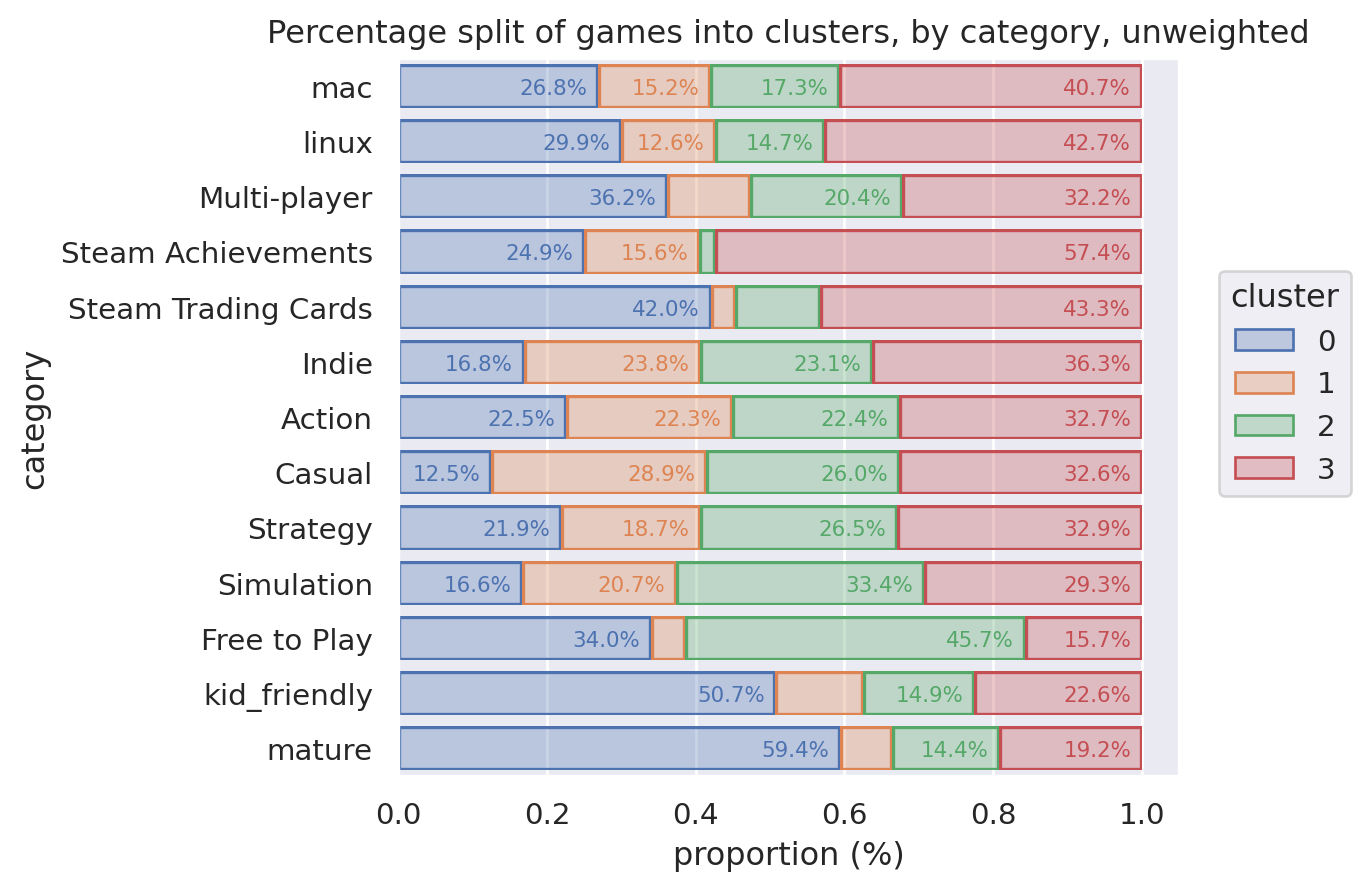

In [13]:
viz = (X.groupby(by='cluster')[categorical].sum() / X[categorical].sum()).T.reset_index(names='category').melt(id_vars='category', var_name='cluster', value_name='proportion (%)')
viz['cluster'] = viz['cluster'].map(str)
viz['text'] = viz['proportion (%)'].map(lambda x: f"{x:.1%}" if x >= 0.12 else "")
(Plot(data=viz, y='category', x='proportion (%)', color='cluster')
 .add(so.Bar(alpha=.3), so.Stack())
 .add(so.Text(halign='right', fontsize=8), so.Stack(),text='text')
 .label(title='Percentage split of games into clusters, by category, unweighted'))

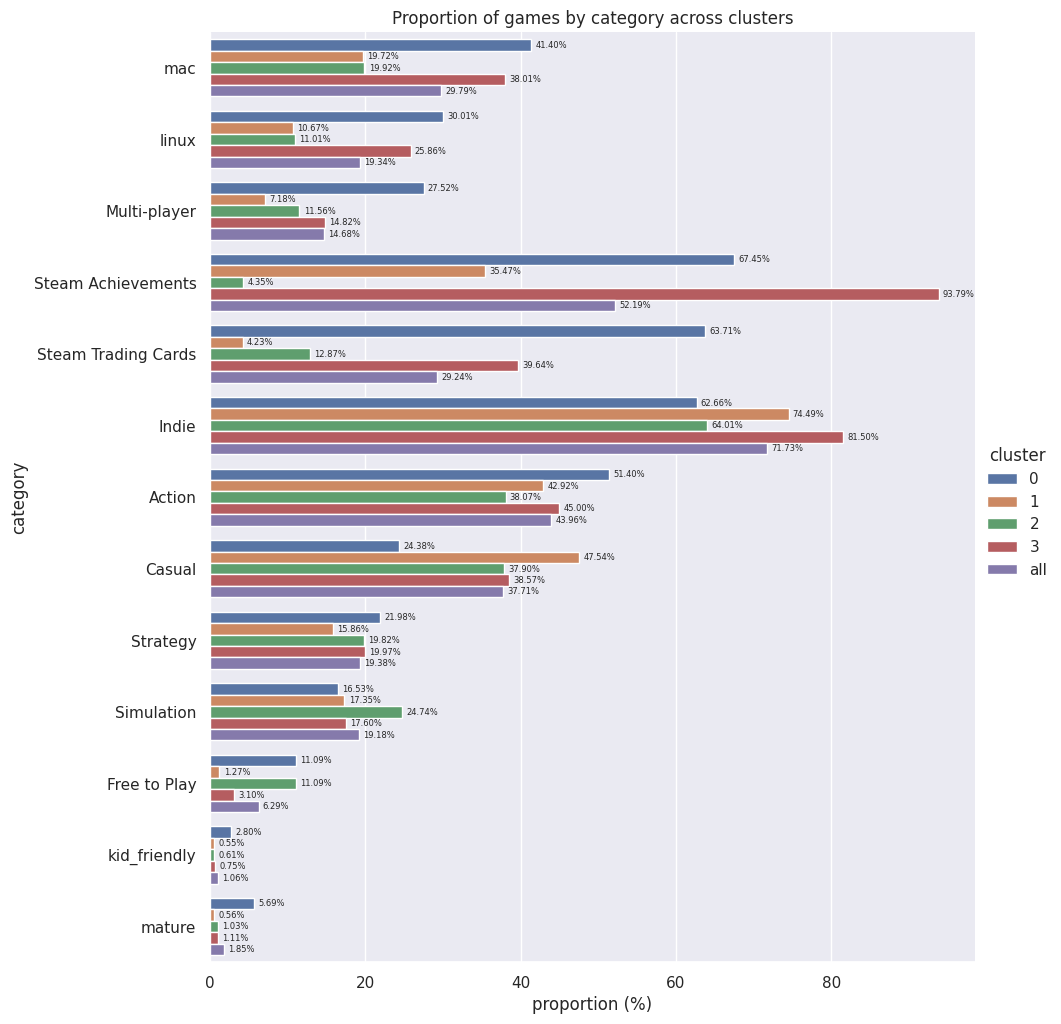

In [14]:
viz = (pd.concat([
    (X.groupby(by='cluster')[categorical].sum() / X.groupby(by='cluster')[categorical].count()).T,
    (X[categorical].sum() / X[categorical].count()).to_frame('all')
], axis=1).round(4) * 100).reset_index(names='category').melt(id_vars='category', var_name='cluster', value_name='proportion (%)')

with rc_context({'font.size': 6}):
    catplot_ylabel(sb.catplot(data=viz, y='category', x='proportion (%)', hue='cluster', kind='bar', height=10), fmt='{0:.2f}%').set(title='Proportion of games by category across clusters')

# Cluster 0 - Classic, Timeless Games that have a solid fan base

This cluster likely consists of staple games that have good retention of their player base after many years. We see that these games are older in general but boast extremely high ownership. Due to their popularity and long age, they are likely to attract many reviews, both good and bad, which can explain why this cluster has more reviews than other clusters on average. Furthermore, this cluster has the highest median playtime which shows that players tend to invest more hours into these games compared to other games which can indicate that these games are good value for money per hour of enjoyment and a massive time sink.

In [15]:
kaggle_steam[kaggle_steam['cluster'] == 0].sort_values(by='positive_ratings', ascending=False).head(10)['name']

appid
730       Counter-Strike: Global Offensive
570                                 Dota 2
440                        Team Fortress 2
578080       PLAYERUNKNOWN'S BATTLEGROUNDS
4000                           Garry's Mod
271590                  Grand Theft Auto V
218620                            PAYDAY 2
304930                            Unturned
105600                            Terraria
550                          Left 4 Dead 2
Name: name, dtype: object

In [16]:
kaggle_steam[kaggle_steam['cluster'] == 0].sample(10)['name']

appid
326180                     Sinister City
214790           The Basement Collection
375900                 Trackmania® Turbo
215930      Jagged Alliance 2 - Wildfire
374670                      Ember Strike
232430                         Gone Home
639780    Deep Space Waifu: FLAT JUSTICE
214970                       Intrusion 2
350700                  Red Stone Online
893520              Creative Destruction
Name: name, dtype: object

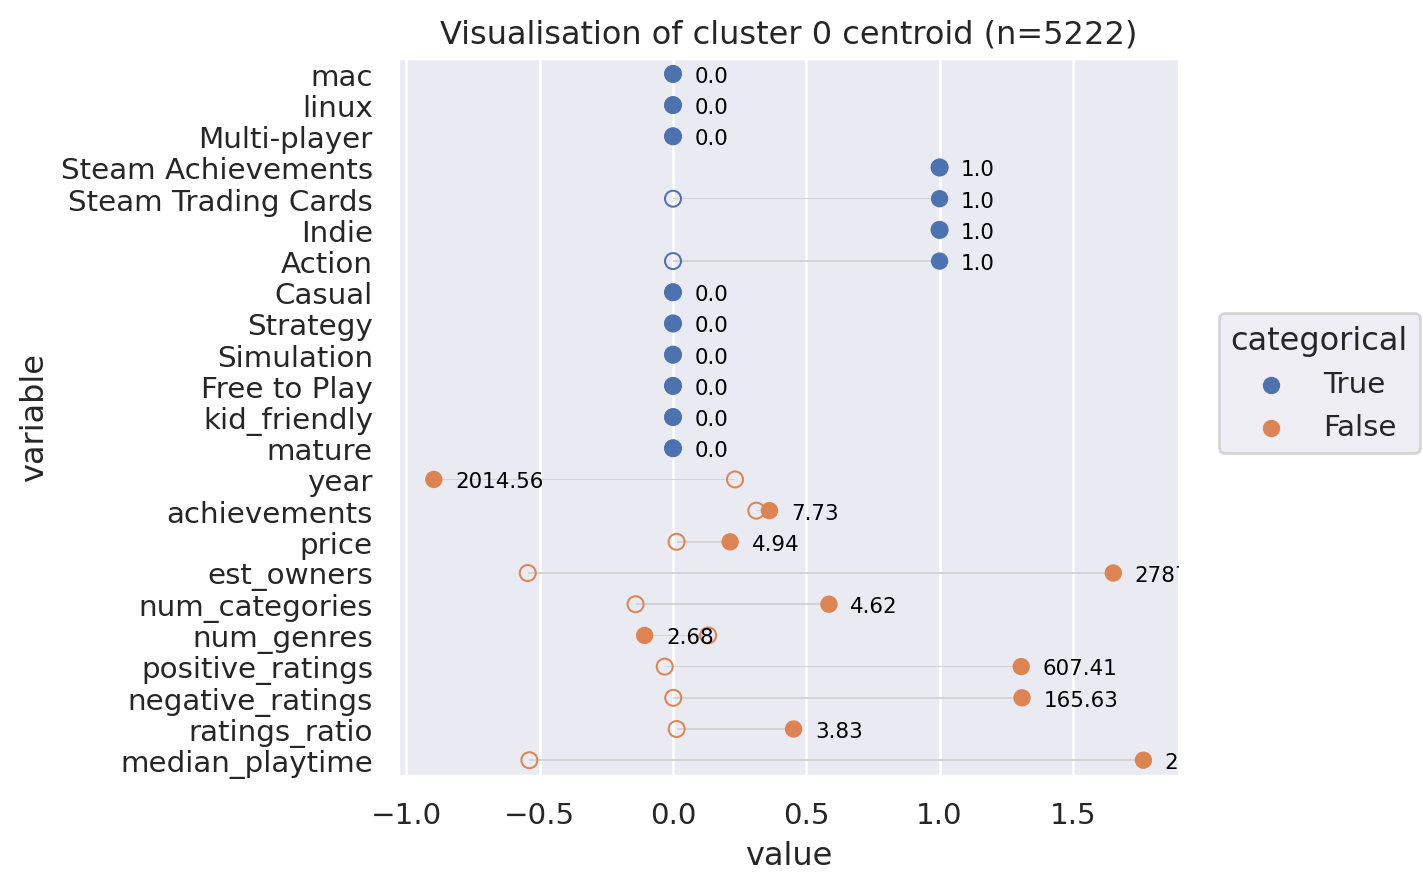

In [17]:
centroid_viz(0)

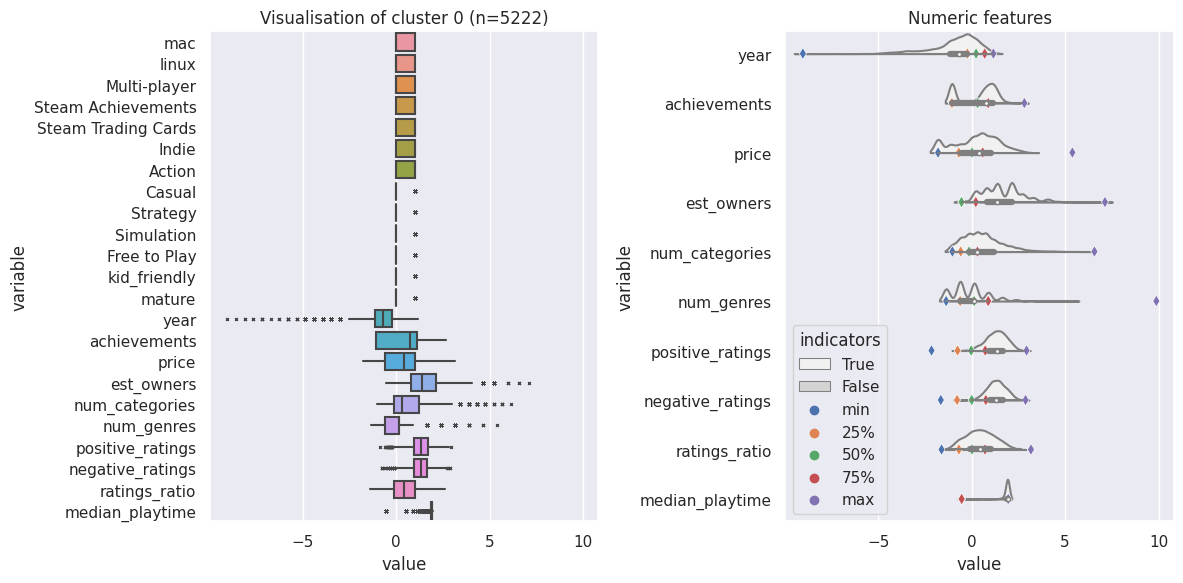

In [18]:
cluster_viz(0)

# Cluster 1: Recent, premium, niche indie games

This cluster generally comprises of newer games that are unlikely to feature `Steam Trading Cards` and least likely to be `Free to play` compared to other clusters. They seem to be `Casual` games that anyone can pick up that fulfill niches such as Story-Based games. Though the centroid indicates that these games are unlikely to have `Steam Achievements`, around `35%` of them still support it. It appears that these games don't take long to complete or feature enough replayability to keep their players playing for more, so they might prove to be a decent choice for those looking for games that require low investment on time. Perhaps due to their newness or nicheness, these games are not owned by many people and do not receive much ratings.

Some of these games do turn out to be extremely addictive, with higher median playtimes compared to the other games within the cluster, however, this tends to be the exception rather than the norm.

In [19]:
kaggle_steam[kaggle_steam['cluster'] == 1].sort_values(by='median_playtime', ascending=False).head(10)['name']

appid
576160            A Long Road Home
610560       Tales of the Lumminai
586600    The Adventures of Fluffy
519890                   Star Boss
620130                  Chaos Town
584860                 Surfasaurus
586160                  Dash Fleet
533660               Ziggy's Chase
545560      Happy Singh Adventures
514710                     Resfort
Name: name, dtype: object

In [20]:
kaggle_steam[kaggle_steam['cluster'] ==  1].sample(10)['name']

appid
646150          Winter Wolves Classic Games Collection
471200                                          Melody
984540                          Hostile User Interface
692170    Virtual Robots - Robot programming simulator
974830                    The Art Theft by Jay Doherty
545840                                Convicted Galaxy
825370                                  A Bloody Party
503650                Fenimore Fillmore: The Westerner
847530                                       HyperBowl
683630                              Half Past Disaster
Name: name, dtype: object

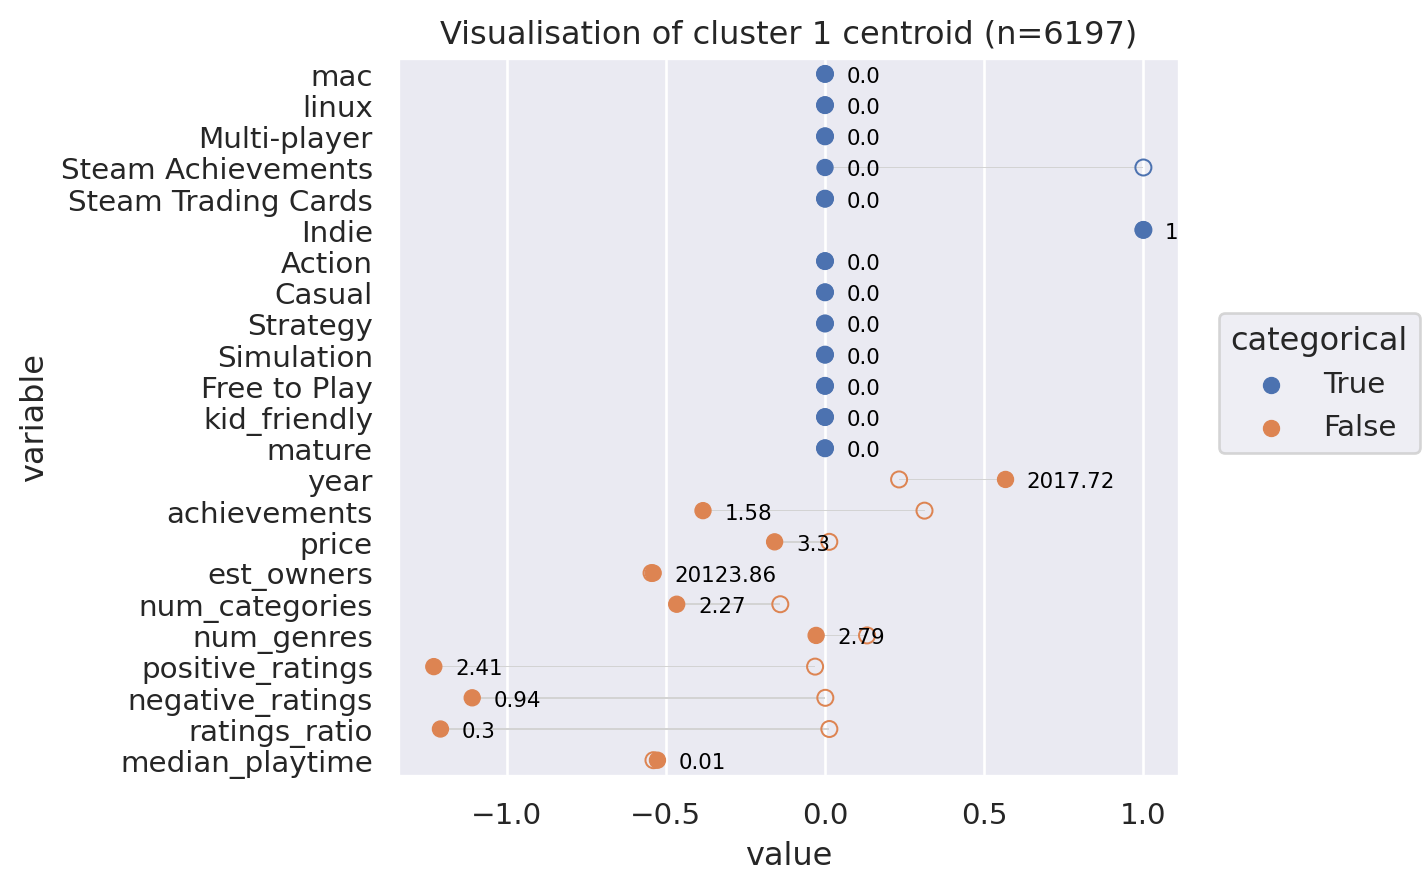

In [21]:
centroid_viz(1)

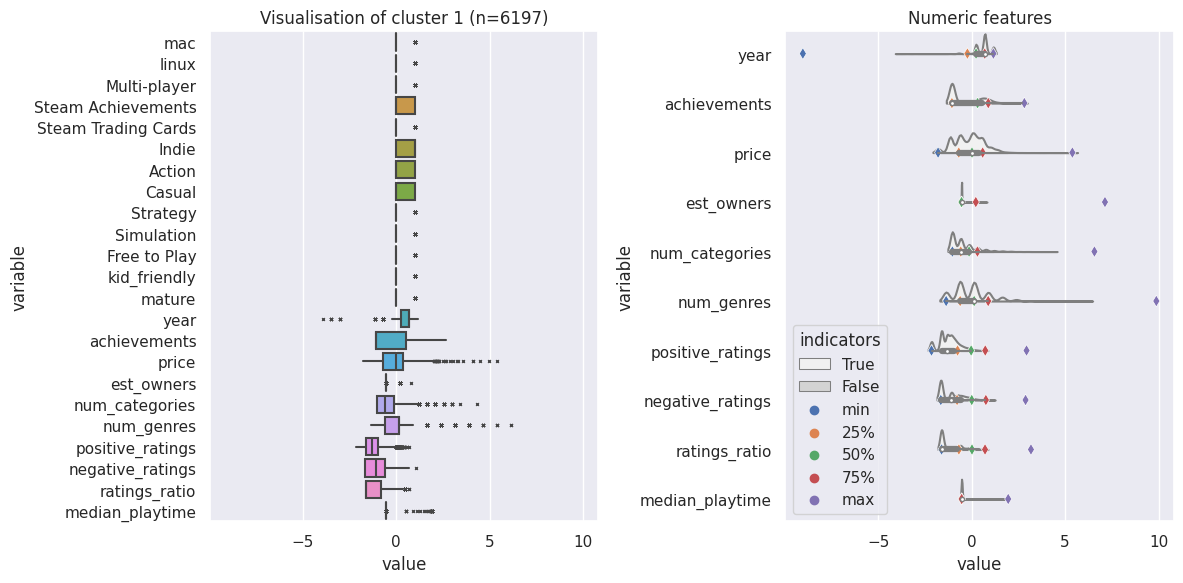

In [22]:
cluster_viz(1)

# Cluster 2: Affordable alternatives to mainstream games

This cluster seems quite similar to cluster 1. With the exception that it contains higher proportion of `Free to Play` and `Simulation`. Since this cluster is also less recent than cluster 1, we think this cluster is closely related to an older generation of indie games following the wake of the super popular Minecraft that spawned many similar games that aimed to simulate mechanics of the world in a game. This cluster also seems to contain free-to-play clones of premium games.

Perhaps these games try to remix popular cliches in an attempt to appeal to a wider audience.

In [23]:
kaggle_steam[kaggle_steam['cluster'] == 2].sort_values(by='negative_ratings', ascending=False).head(10)['name']

appid
822240      Animal Jam - Play Wild!
267600       Airport Simulator 2014
1025580                   Vainglory
454350                  Days of War
792990                     Identity
214700     Thirty Flights of Loving
352950        Better Late Than DEAD
694720                     notmycar
409590                     KINGDOMS
656240                         Heat
Name: name, dtype: object

In [24]:
kaggle_steam[kaggle_steam['cluster'] ==  2].sample(10)['name']

appid
423900                  Dinocide
672240       Dreams of Greatness
708480             Little People
812040    Shortest Trip to Earth
753610                   J.A.W.S
666730        This Merchant Life
798590                Elven Love
294730        Marine Park Empire
340210            Predestination
415330              When In Rome
Name: name, dtype: object

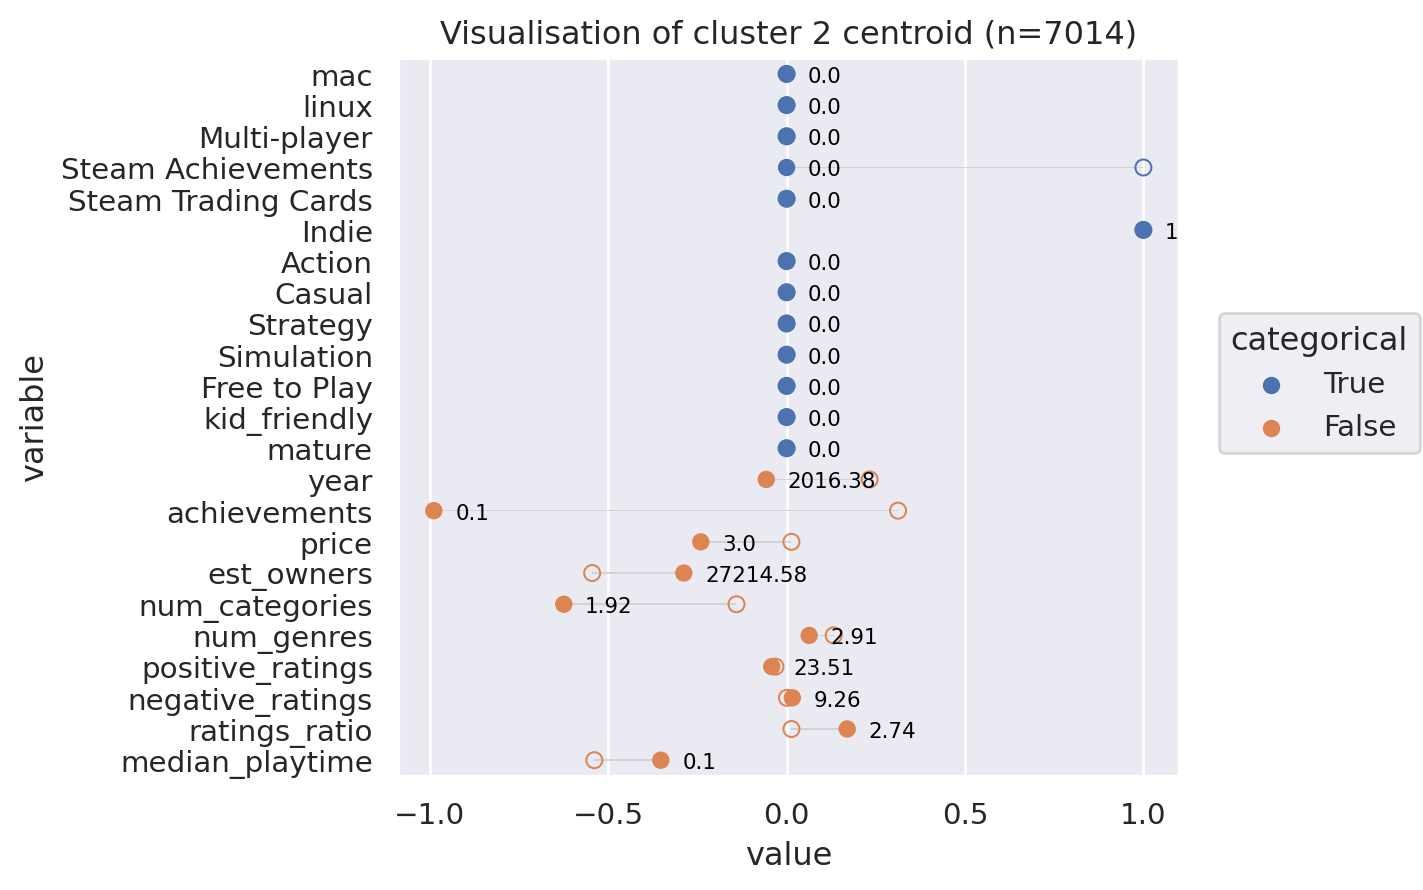

In [25]:
centroid_viz(2)

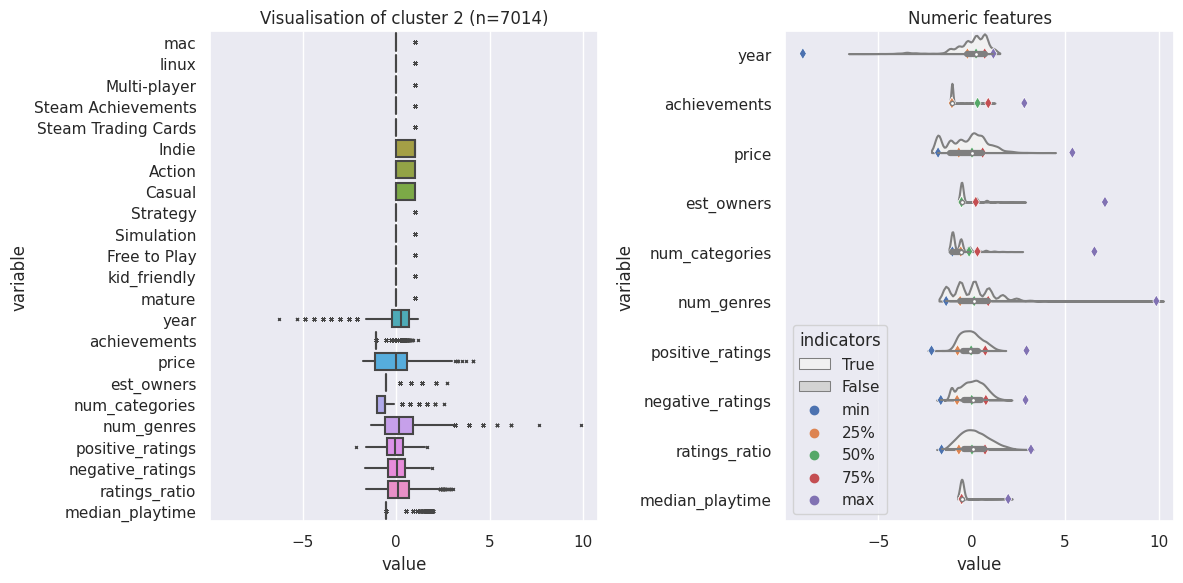

In [26]:
cluster_viz(2)

# Cluster 3

In [27]:
kaggle_steam[kaggle_steam['cluster'] == 3].sort_values(by='median_playtime', ascending=False).head(10)['name']

appid
656370                                           Warp Rider
687480               Trivia Vault: Science & History Trivia
568320                                             Pictopix
692030                                    Tennis World Tour
675240                                Shining Song Starnova
724470                                          Lazy Galaxy
614630                                           Tiny Rails
645730    RESONANCE OF FATE™/END OF ETERNITY™ 4K/HD EDITION
226820                  Nancy Drew®: Ghost of Thornton Hall
480450                                        Floppy Heroes
Name: name, dtype: object

In [28]:
kaggle_steam[kaggle_steam['cluster'] ==  3].sample(10)['name']

appid
544790    Happy Empire - A Bouquet for the Princess
567140                        Mahjong Magic Journey
937210                                  МЫЛО УРОНИЛ
907770                                        STONE
377480       N.E.R.O.: Nothing Ever Remains Obscure
408860                                    Dead Stop
536780               Lost Grimoires: Stolen Kingdom
617700                                  Weed Shop 2
673010                                        WILOO
440340                                Banzai Escape
Name: name, dtype: object

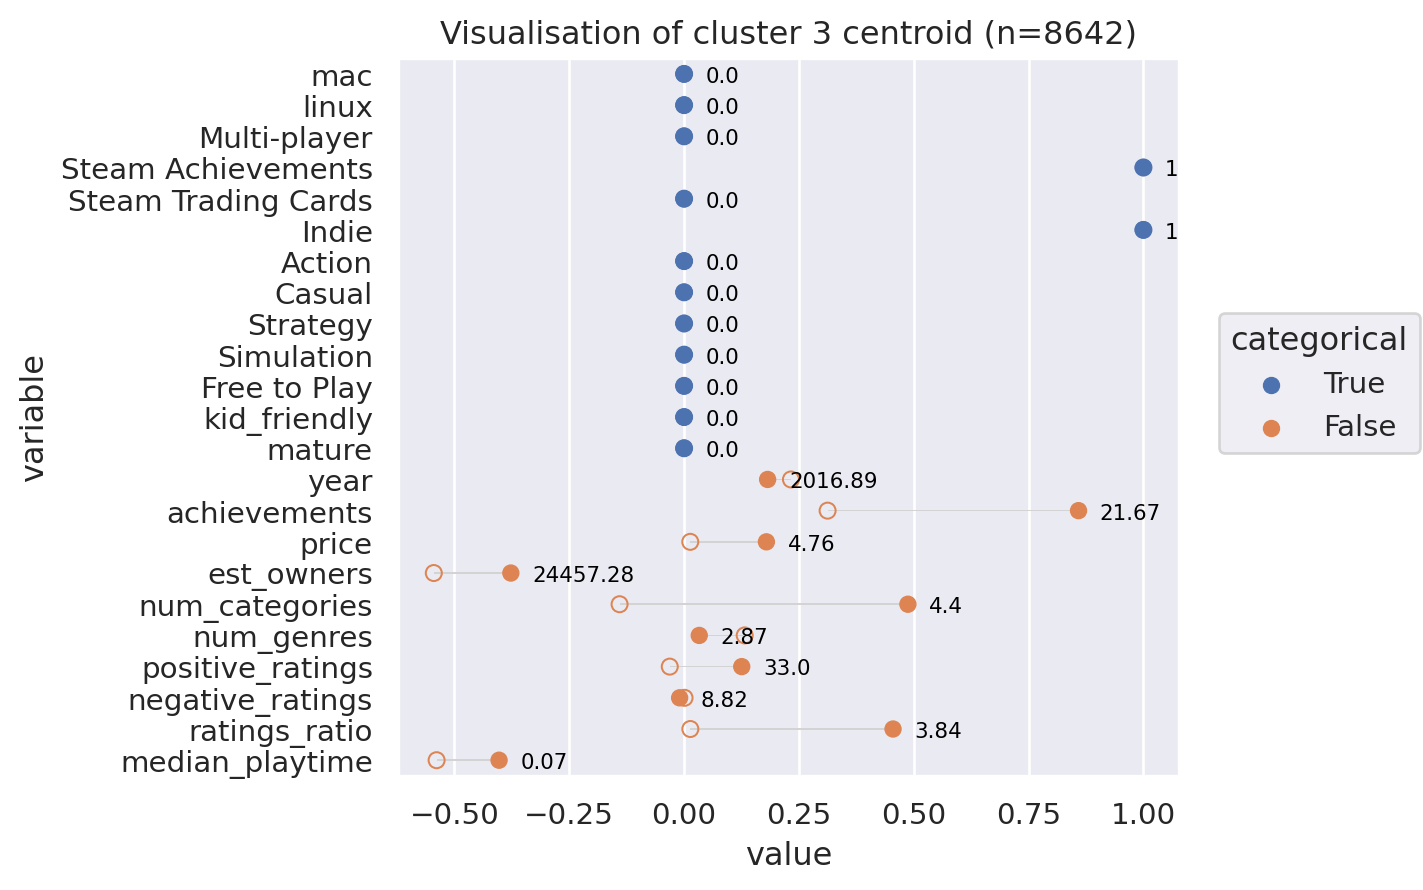

In [29]:
centroid_viz(3)

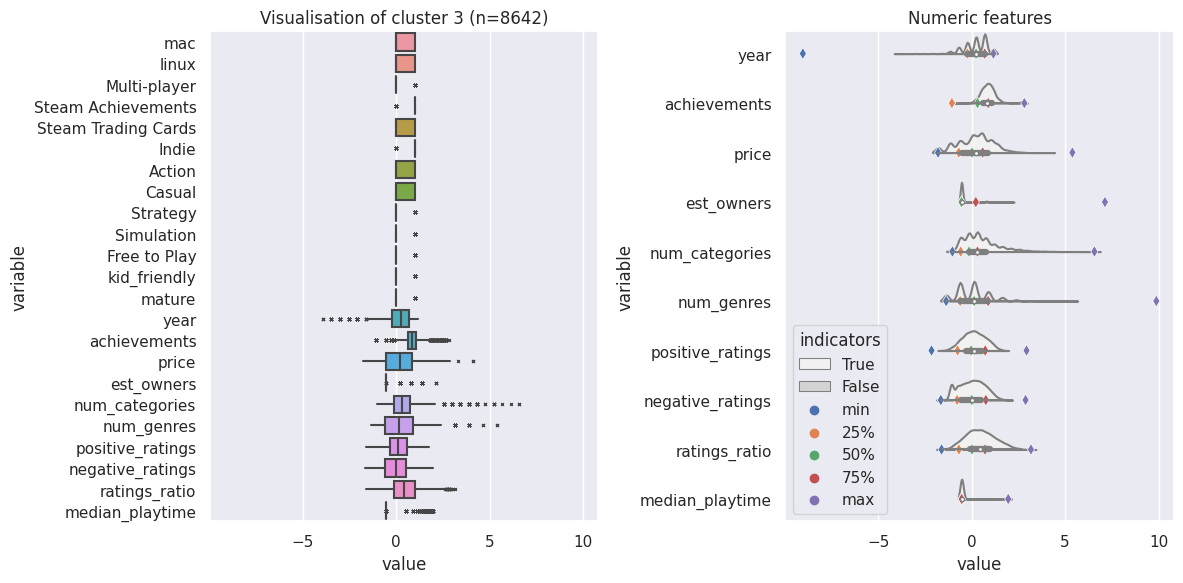

In [30]:
cluster_viz(3)

# Summary

Overall, it was insightful to see how a clustering algorithm like KPrototypes can help us uncover hidden patterns in data that would otherwise take many years of domain expertise to match.

We found the following four clusters:
- Cluster 0: Classic, Timeless Games that have a solid fan base
- Cluster 1: Recent, premium, niche indie games
- Cluster 2: Affordable alternatives to mainstream games
- Cluster 3:

However, we were disappointed to learn that KPrototypes did not seem to make much use of the categorical data that we have provided to it. Perhaps this will change if we increase the numbers of clusters for KPrototypes to find, where it may make greater use of categorical features to distinguish between clusters. Most likely, at low levels of `k`, numerical features dominate over categorical features in terms of descriptive power.

Normally, a silhouette score of `0.1419` is considered quite bad. However, that is to be expected for our dataset given that the features don't describe something innate about the games e.g. `number of files`, `game size on disk`, `number of assets`, `total length of cutscenes` etc, but rather external feedback about the games. Given how well our PCA pairplot turned out, we feel that KPrototypes has done a good job.

Our only complaint is that clustering using KPrototypes is quite slow which makes it infeasible for higher numbers of `k` without some serious computing power.

# Appendix

Below we provide additional visualisations of the data we have gathered.

## Largest 50 Developers of Top 1000 Steam Games, and associated clusters

We first limited our search to the Top 1000 Steam Games by number of owners and then extracted their developers. Then, we took the top 50 developers based on the total number of games they have published on Steam. After that, we analyse the games they have published in this plot. We see that cluster 0 is completely dominant here, with cluster 2 being a runner up. Unsurprisingly, cluster 1 is the rarest, agreeing with our earlier analyses.

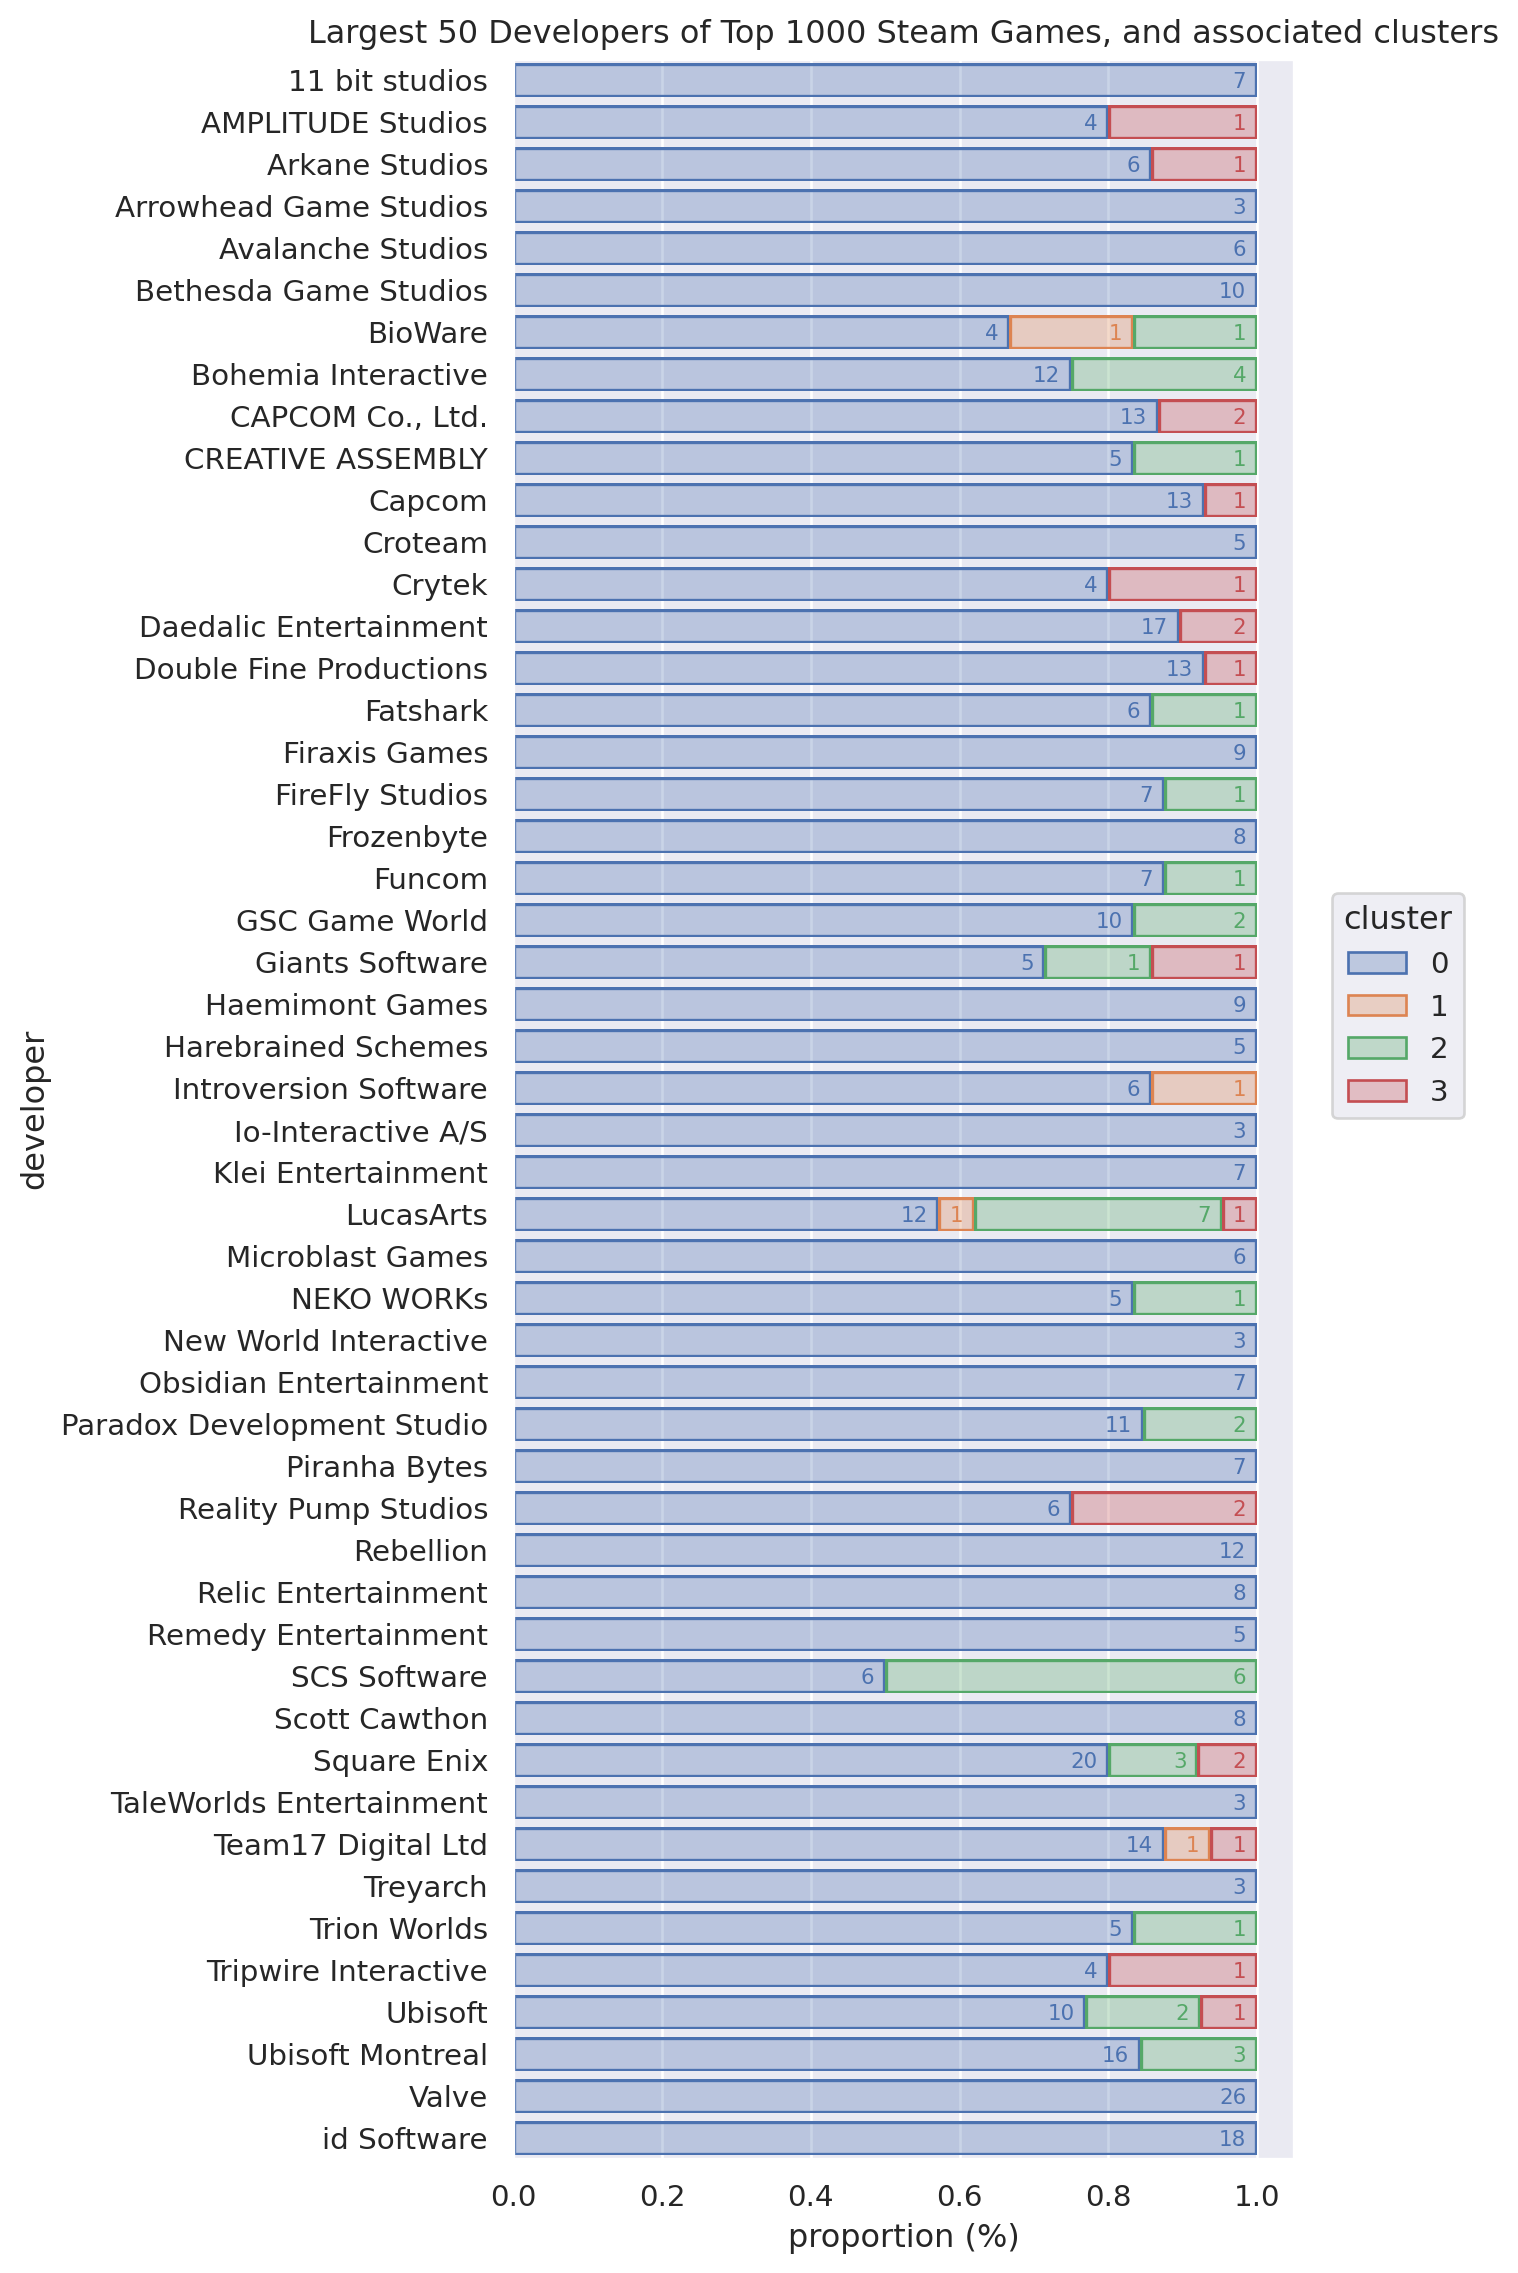

In [31]:
viz = kaggle_steam.loc[X.nlargest(1000, "est_owners").index]['developer'].value_counts().nlargest(50)
viz = kaggle_steam.loc[kaggle_steam['developer'].map(lambda x: x in viz.index)]
viz = viz.groupby(['developer', 'cluster']).count().iloc[:,0].rename('count')
viz = pd.concat([viz, (viz / viz.groupby(level='developer').sum()).rename('proportion (%)')], axis=1)
viz = viz.reset_index().sort_values(by=['cluster', 'developer'])
viz['cluster'] = viz['cluster'].map(str)
viz['developer'] = viz['developer'].map(lambda x: f"{x.split(';')[0]} and {len(x.split(';')) - 1} others" if ';' in x else x)
(Plot(data=viz, y='developer', x='proportion (%)', color='cluster')
 .layout(size=(7,12))
 .add(so.Bar(alpha=.3), so.Stack())
 .add(so.Text(halign='right', fontsize=8), so.Stack(), text='count')
 .label(title='Largest 50 Developers of Top 1000 Steam Games, and associated clusters'))


## Sample of 50 Developers of Bottom 5000 Steam Games, and associated clusters

We took the bottom 5000 games and sampled 50 developers from it. Here, cluster 1 is dominant and cluster 0 is the rarest. Cluster 2 is also somewhat frequent in this plot.

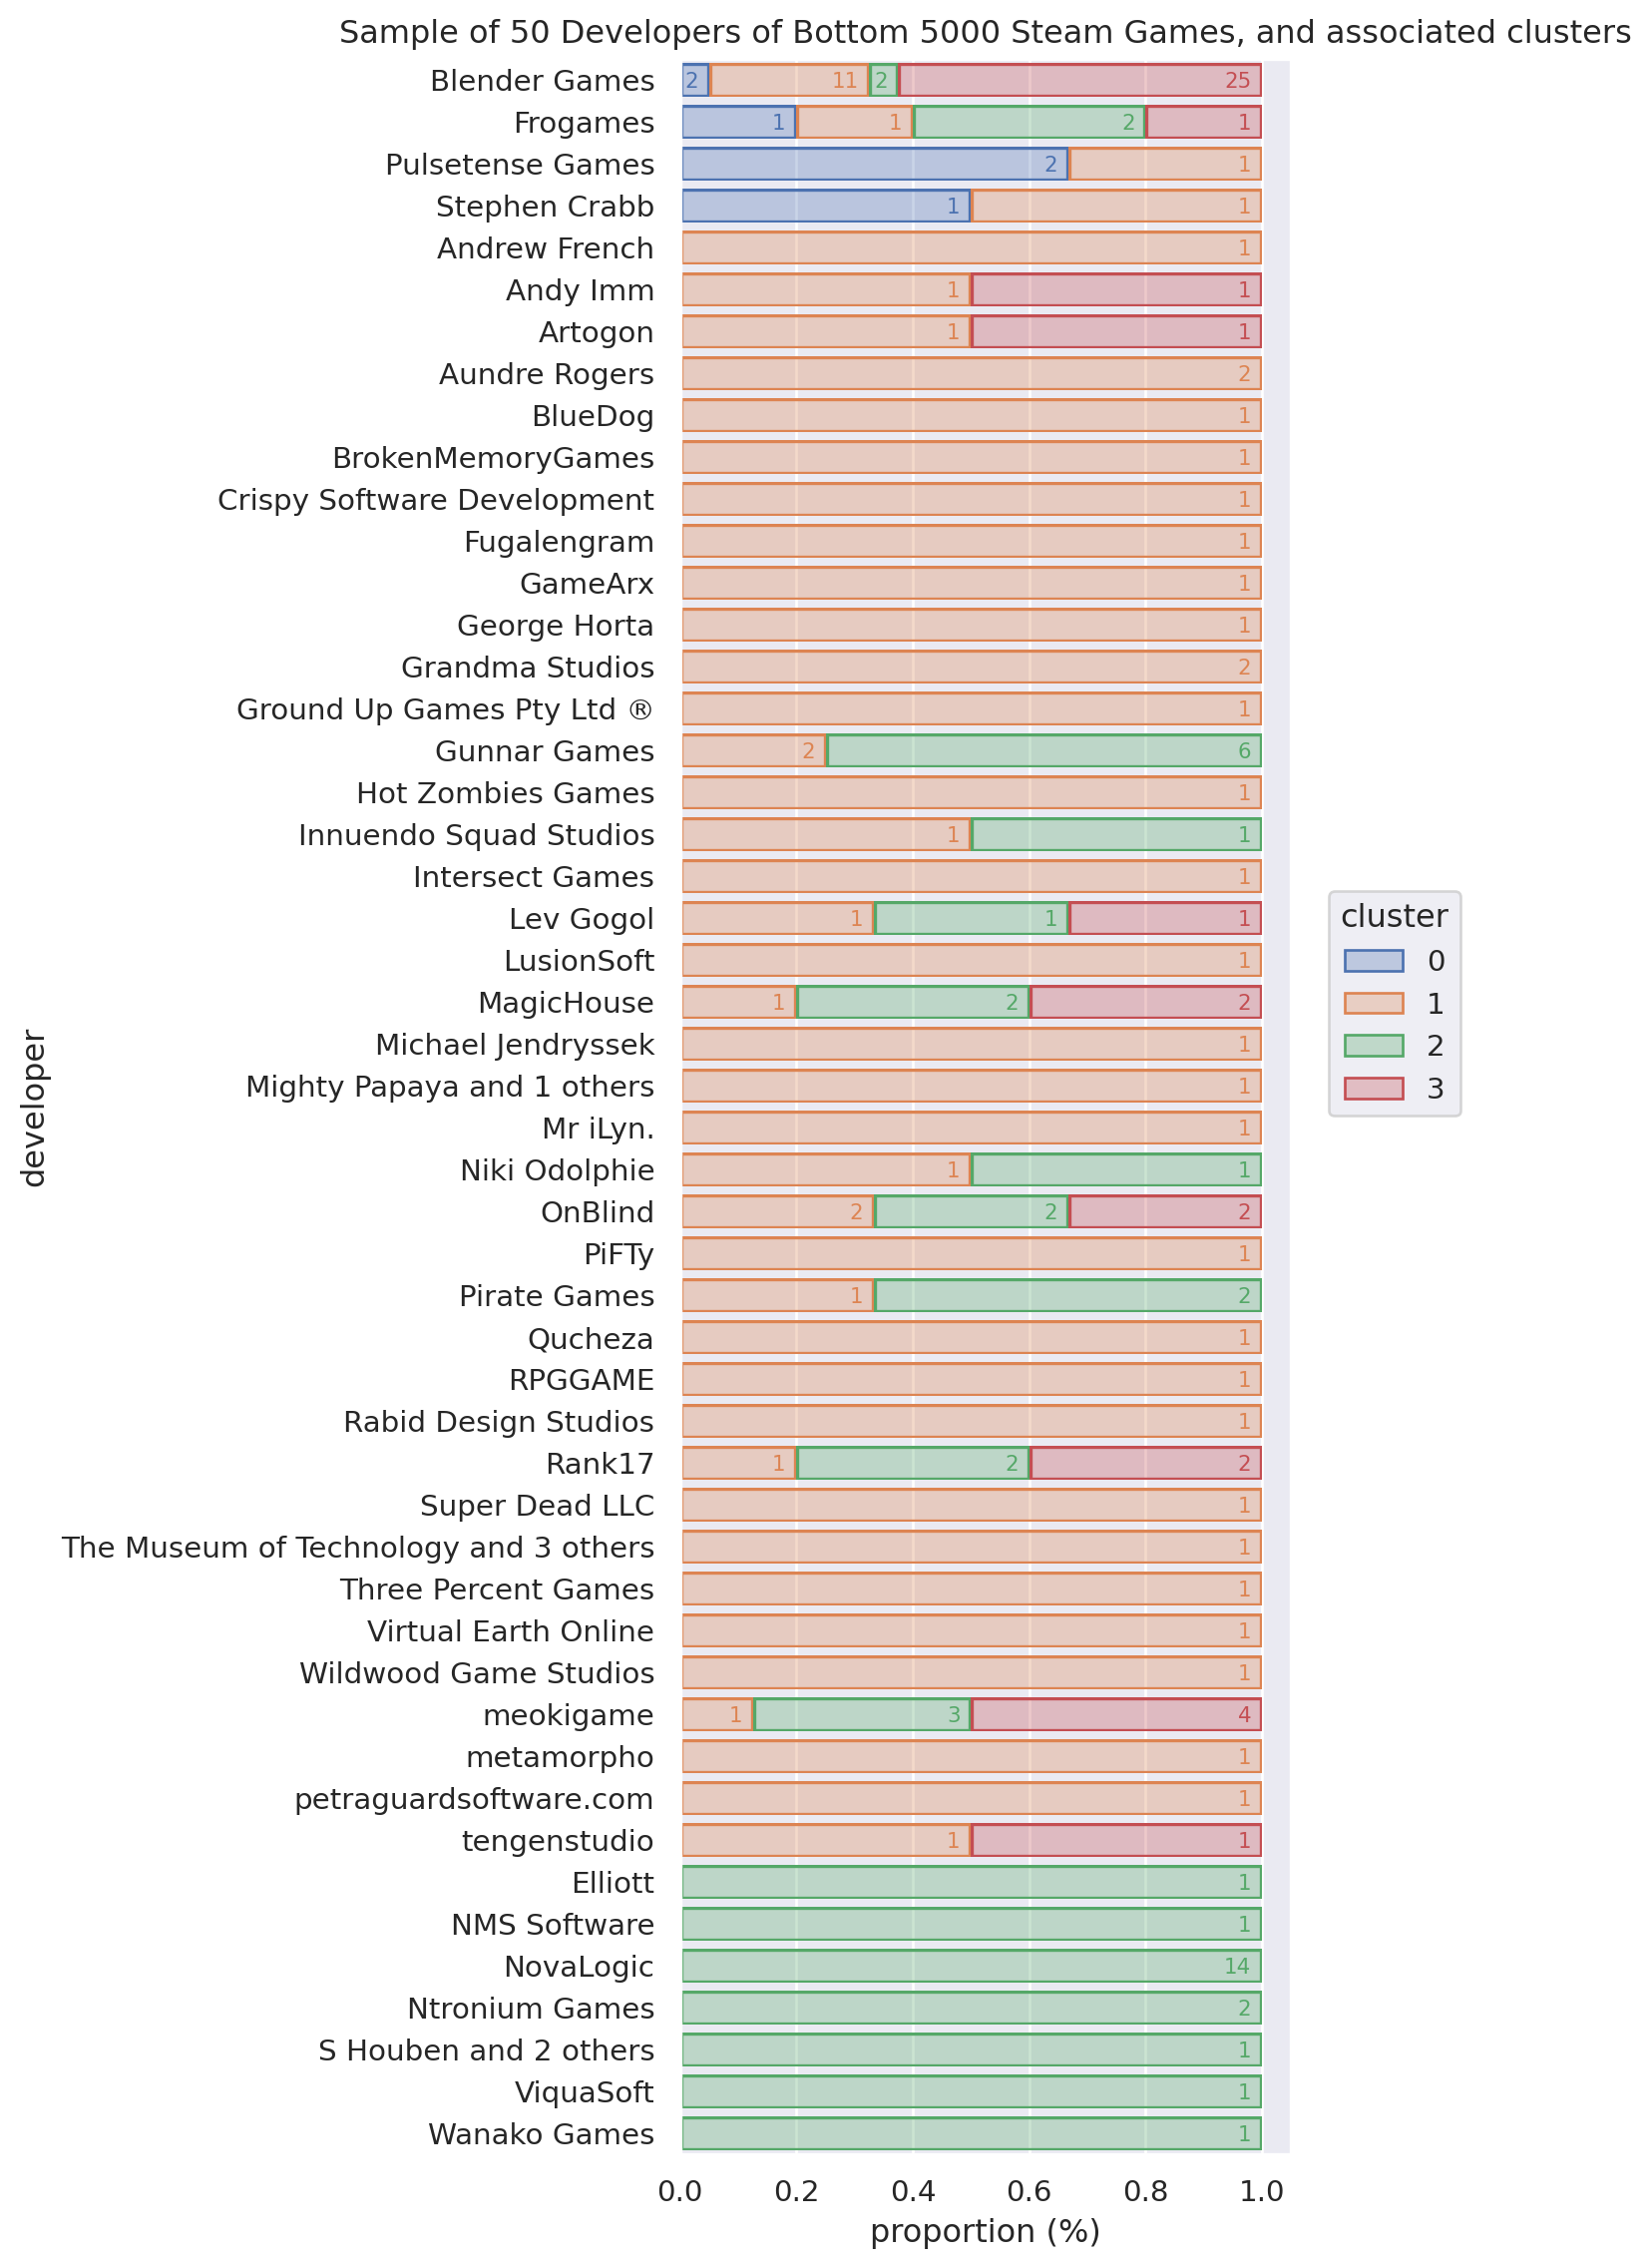

In [32]:
viz = kaggle_steam.loc[X.nsmallest(5000, "est_owners").index]['developer'].value_counts().sample(50)
viz = kaggle_steam.loc[kaggle_steam['developer'].map(lambda x: x in viz.index)]
viz = viz.groupby(['developer', 'cluster']).count().iloc[:,0].rename('count')
viz = pd.concat([viz, (viz / viz.groupby(level='developer').sum()).rename('proportion (%)')], axis=1)
viz = viz.reset_index().sort_values(by=['cluster', 'developer'])
viz['cluster'] = viz['cluster'].map(str)
viz['developer'] = viz['developer'].map(lambda x: f"{x.split(';')[0]} and {len(x.split(';')) - 1} others" if ';' in x else x)
import warnings
warnings.filterwarnings('ignore')
(Plot(data=viz, y='developer', x='proportion (%)', color='cluster')
 .layout(size=(7,12))
 .add(so.Bar(alpha=.3), so.Stack())
 .add(so.Text(halign='right', fontsize=8), so.Stack(), text='count')
 .label(title='Sample of 50 Developers of Bottom 5000 Steam Games, and associated clusters'))

## Growth of Steam over time, by cluster

We see that the algorithm tends to classify older games as cluster 0 while steadily reducing its intake of newer ones. This is probably because games need to pass the test of time in order to prove that they are true classics.

Meanwhile, we see that Steam has undergone an explosive growth after 2015, largely due to the influx of games from cluster 1, 2 and 3.

Cluster 1 is notably the "youngest" cluster while cluster 0 is the "oldest".

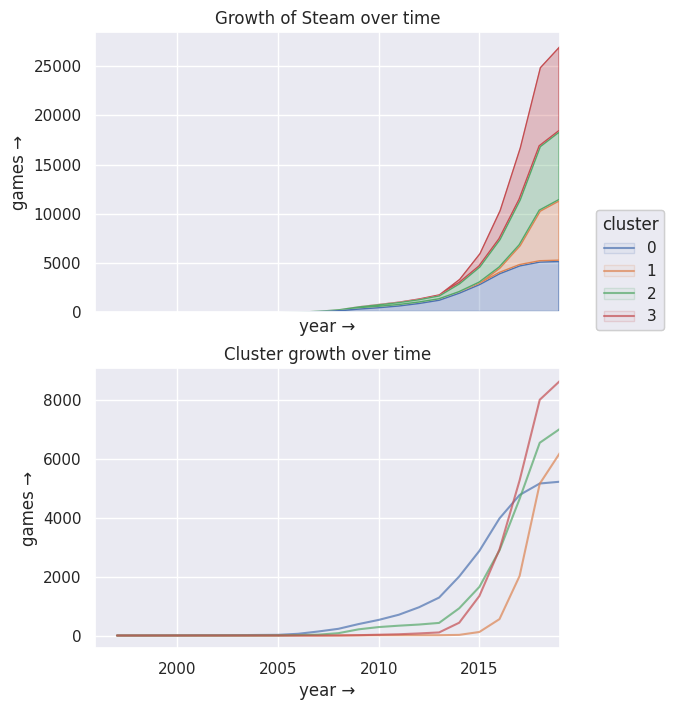

In [33]:
viz = kaggle_steam.copy()
viz['year'] = kaggle_steam['release_date'].str.split('-').map(lambda x: int(x[0]))
viz = (viz
            .groupby(by=['cluster', 'year'])
            .agg('count')
            .iloc[:, 0]
            .rename('games')
            .reset_index()
            .pivot(index='year', columns='cluster', values='games')
            .fillna(0) # for years which have no game data, set as 0
            .cumsum()
            .unstack()
            .rename('games')
            .reset_index())

viz['cluster'] = viz['cluster'].map(str)
fig, ax = plt.subplots(nrows=2, figsize=(6,8), sharex=True)
fig.set_tight_layout(True)
(Plot(viz, "year", "games", color="cluster")
    .add(so.Area(alpha=.3), so.Stack())
    .limit(x=(None, 2019))
    .label(title='Growth of Steam over time', x='year →', y='games →')
    .on(ax[0])
    .plot())
(Plot(viz, "year", "games", color="cluster")
    .add(so.Line(alpha=.7))
    .limit(x=(None, 2019))
    .label(title='Cluster growth over time', x='year →', y='games →')
    .on(ax[1])
    .plot())
None

## Treemap of steam games by number of owners and assigned clusters

We can easily see the contrast in the popularity of the games belonging to different clusters in this plot. Notably, as popularity of game increases, clusters 1, 2, 3 start to vanish and cluster 0 completely takes over.

Interestingly, there are 96 games classified as cluster 0 under 0-20K owners. Perhaps this is a side effect of low silhouette scores that we have to be careful about, as games lying close to the boundaries can get misclassified.

We also note that cluster 1 lies solely between 0-20K, with very few games in 20-50K. There is a lone game in cluster 1 in 50K-100K.

In [67]:
import plotly.express as px
viz = kaggle_steam.copy().loc[:,['cluster', 'owners']]
viz['owners'] = viz['owners'].str.split('-')
viz['lo'] = viz['owners'].map(lambda x: shorten(int(x[0])))
viz['hi'] = viz['owners'].map(lambda x: shorten(int(x[1])))
viz['owners'] = viz['lo'] + '-' + viz['hi']
viz = viz.groupby(['owners', 'cluster']).count().iloc[:, 0].rename('count').reset_index()
viz['cluster'] = viz['cluster'].map(str)

fig = px.treemap(viz, 
                 path=[px.Constant("games"), 'owners', 'cluster'], 
                 values='count', 
                 color='cluster', 
                 color_discrete_sequence=list(sb.palettes.color_palette('Set3').as_hex()),
                 title='Treemap of steam games by number of owners and assigned clusters')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=0, r=0, b=0))

## Treemap of steam games by assigned clusters and number of owners

This is the inverse of the earlier plot, where we clearly see the breakdowns of each cluster. When comparing cluster 0 and 1 side-by-side, the difference is very apparent.

In [72]:
import plotly.express as px
viz = kaggle_steam.copy().loc[:,['cluster', 'owners']]
viz['owners'] = viz['owners'].str.split('-')
viz['lo'] = viz['owners'].map(lambda x: shorten(int(x[0])))
viz['hi'] = viz['owners'].map(lambda x: shorten(int(x[1])))
viz['owners'] = viz['lo'] + '-' + viz['hi']
viz = viz.groupby(['cluster', 'owners']).count().iloc[:, 0].rename('count').reset_index()
viz['cluster'] = viz['cluster'].map(str)

fig = px.treemap(viz, 
                 path=[px.Constant("games"), 'cluster', 'owners'], 
                 values='count', 
                 color='owners', 
                 color_discrete_sequence=list(sb.palettes.color_palette('Set2').as_hex()),
                 title='Treemap of steam games by assigned clusters and number of owners')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=0, r=0, b=0))